# Error analysis 

As part of a deeper analysis into models of interest, error analysis focuses on the mistakes made by a model. It identifies which features -and their corresponding values- are present in mistakes made by a model while (1) mistakengly assigning negative labels (FN), (2) mistakenly assingning positive labels (FP), and (3) mistakenly assigning positive and negative labels. 

This error analysis can be focused on only False Negatives, only False Positives, or both at the same time. 

### Mistakes in assigning negative labels 

(`error_type`: `error_negative_label`)

A Decision Tree (DT) is trained based on the True and False **negative** values assigned by the predicting model. The positive labels (1) are the mistakes (FN), while the negative labels (0) are the asserts of the predictive model for the negative label (TN).  


The output will take the features with the top feature importance, and so, those features are the ones present when the model makes mistakes assinging negative labels. 

### Mistakes in assigning positive labels 

(`error_type`: `error_positive_label`)

A Decision Tree (DT) is trained based on the True and False **positive** values assigned by the predicting model. The positive labels (1) are the mistakes (FP), while the negative labels (0) are the asserts of the predictive model for the positive label (TP).  

The output will take the features with the top feature importance, and so, those features are the ones present when the model makes mistakes assinging positive labels. 

### Mistakes in assigning negative and positive labels 

(`error_type`: `error_general_label`)

A Decision Tree (DT) is trained based on the True and False values assigned by the predicting model. The positive labels (1) are the mistakes (FN and FP), while the negative labels (0) are the asserts of the predictive model in both, the positive and negative label (TP and TN).  

The output will refer the features with the top feature importance, and so, those features are the ones present when the model makes mistakes assinging negative labels. 

### How to generate an error analysis

Within the postmodeling analysis configuration file `postmodeling_config.yaml` there is a section for the error analysis that defines the different sizes of lists, the maximum depth tried on different decision trees, and a flag indicating if the outputs are going to be plotted or saved as image files (in the output path of the experiment defined in the main configuration file). 

The following snippet of code shows an example of the `postmodeling_confg.yaml` with the default values for each element of the error analysis.

```
error_analysis:
  # Size of the list.
  k: [100]
  
  # Parameter grid to try on the DecisionTreeClassifier trained for the error analysis.
  model_params:
    max_depth: [5]

  # Flag to define if plots are going to be displayed (True) or saved (False)
  view_plots: False
```

You can run the error analysis with the default values, or you can change them -specially the size of the list- depending on your specific project. 

In [2]:
import yaml

from sqlalchemy import create_engine
from triage.component.postmodeling.error_analysis import (
    generate_error_analysis,
    output_all_analysis,
    output_specific_error_analysis,
    output_specific_configuration
)

### Load Database 

Your database configuration file should have the following structure: 

~~~
host: yourhost
user: youruser
db: databasename
pass: yourpassword
port: portofdb
~~~

In [3]:
# Configure Database, note that the file is expected to be in the same path as this notebook. 
with open('database.yaml') as file:
    dbconfig = yaml.full_load(file)

host= dbconfig['host']
user= dbconfig['user']
database= dbconfig['db']
password= dbconfig['pass']
port= dbconfig['port']

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user, password, host, port, database))

db_conn = engine.connect()

🛑  &nbsp;&nbsp; **Warning!** The `model_id` **must** have predictions already persisted in the DB. 

In [ ]:
model_id = 1169
project_path = "s3://path/of_the_output/generated/by/triage"

To run the error analysis call the function `generate_error_analysis` with the `model_id` you would like to analyze and the path in which the matrices of these model are.

In [5]:
error_analysis_results = generate_error_analysis(model_id, db_conn, project_path)

2025-03-06 20:33:21 -    INFO extracting predictions from model id: 1169
2025-03-06 20:33:22 -    INFO matrix uuid: 61601897f1d513dac944340318963c2b
2025-03-06 20:33:22 -    INFO file in S3
2025-03-06 20:33:22 -    INFO Found credentials in shared credentials file: ~/.aws/credentials



### Outputs 

The error analysis model will generate 2 outputs: 

1. Feature importances plots 
2. Rules generated for the decision tree plot

If the parameter for displaying the plots in the configuration file is set upt to False, both outputs will be saved as `png` files on the project path defined in the path `error_analysis/feature_importance` and `error_analysis/tree` for the feature importance plots and the decision trees generated respectively. If the parameter of displaying the plots is set to True, both outputs will be displayed as part of the run. 

#### Retrieve the outputs



##### Retrieve output from a specific type of error analysis 

This function will allow you to retrieve the outputs from all the trees generated for a specific type of error analysis: mistakes in assigning negative labels, mistakes in assigning positive labels, mistakes in assigning negative and positive labels.


        
    Model id: 1169
    Error analysis type: Mistakes assigning Positive labels (FP)
    Size of the list: 100
    Decision Tree with max_depth of, 5

    Top feature importance associated with error in label type Mistakes assigning Positive labels (FP)
    


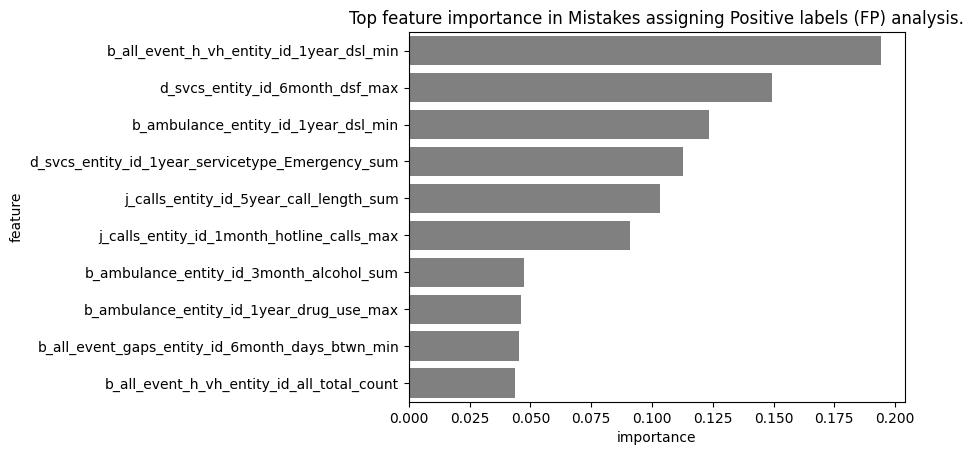


    Rules made with the top features associated with Mistakes assigning Positive labels (FP)
    


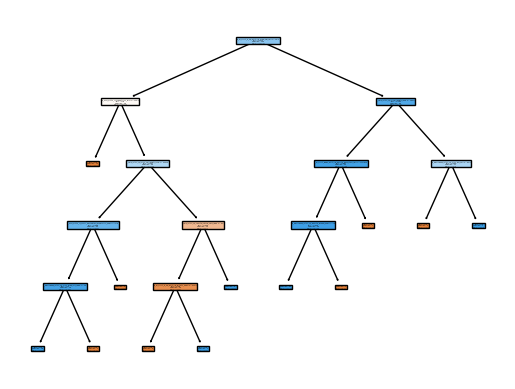

             ######            
*******************************************


In [6]:
output_specific_error_analysis(error_analysis_results, error_type='error_positive_label')


        
    Model id: 1169
    Error analysis type: Mistakes assigning Negative labels (FN)
    Size of the list: 100
    Decision Tree with max_depth of, 5

    Top feature importance associated with error in label type Mistakes assigning Negative labels (FN)
    


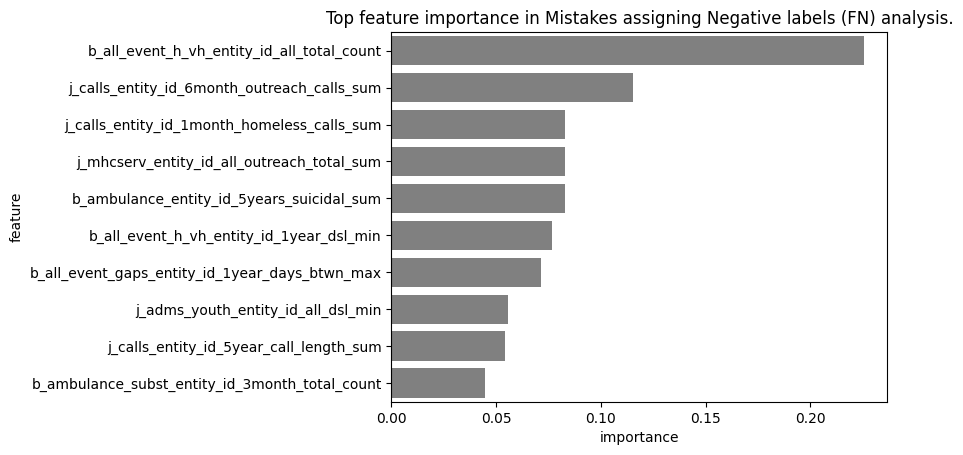


    Rules made with the top features associated with Mistakes assigning Negative labels (FN)
    


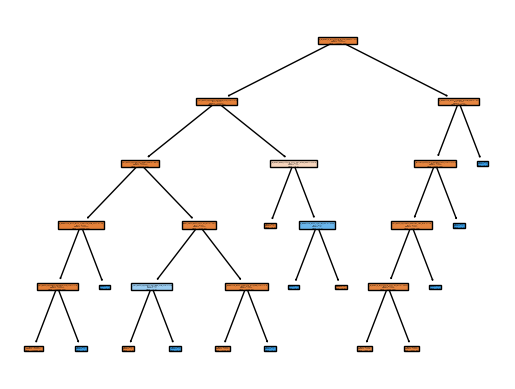

             ######            
*******************************************


In [7]:
output_specific_error_analysis(error_analysis_results, error_type='error_negative_label')


        
    Model id: 1169
    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 100
    Decision Tree with max_depth of, 5

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


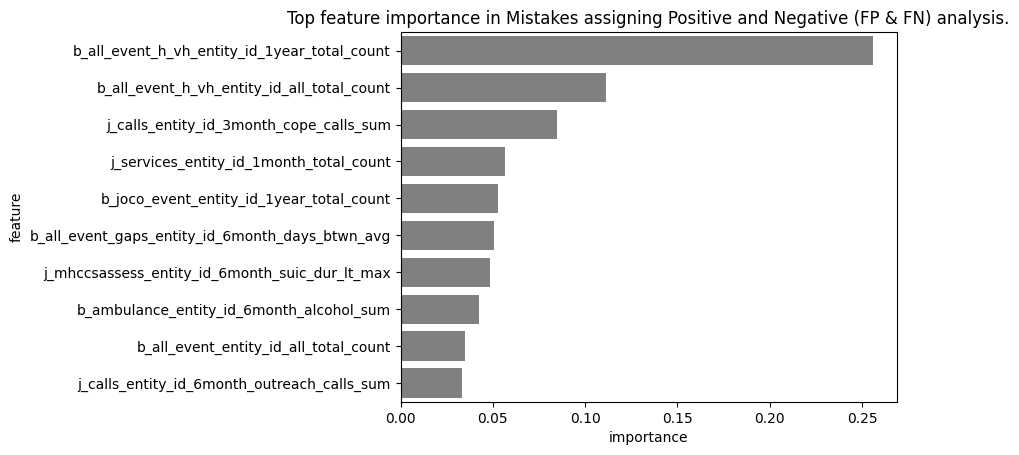


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


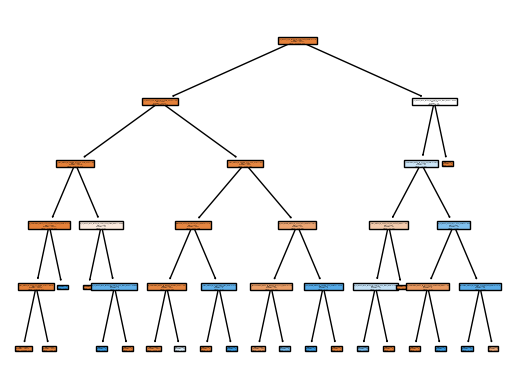

             ######            
*******************************************


In [8]:
output_specific_error_analysis(error_analysis_results, error_type="error_general_label")


##### Retrieve output from a specific configuration 

This function will allow you to retrieve the feature importance plot and decision tree generated for a specific configuration of decision tree and list size of a specifit type of mistake analyzed. 


In [9]:
output_specific_configuration(error_analysis_results, error_type="error_negative_label", 
                             k=100, max_depth=10)

In [10]:
output_specific_configuration(error_analysis_results, error_type="error_positive_label", 
                             k=100, max_depth=10)

In [11]:
output_specific_configuration(error_analysis_results, error_type="error_general_label", 
                             k=100, max_depth=10)

##### Retrieve output from all the types of mistakes

Finally, this function will allow you to retrieve the outputs from all the trees generated from all the types of mistakes and all the configurations of decision trees and size lists. 

Error Analysis
--------------


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 100
    Decision Tree with max_depth of, 1

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


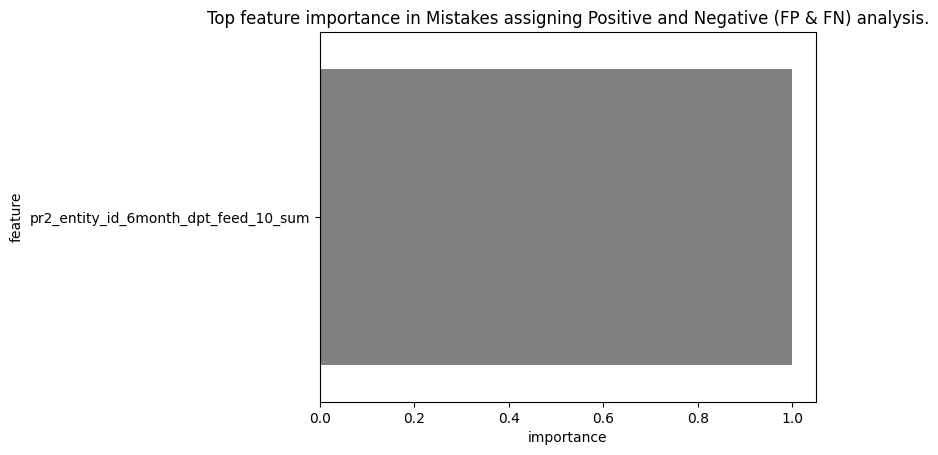


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


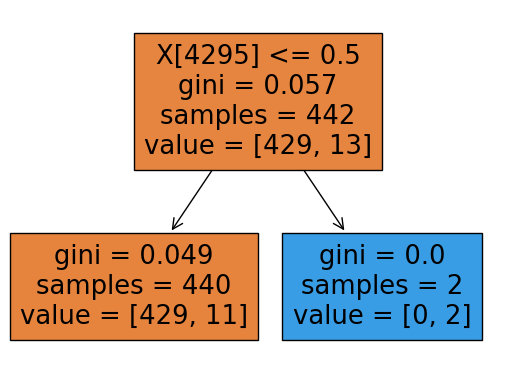

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 100
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


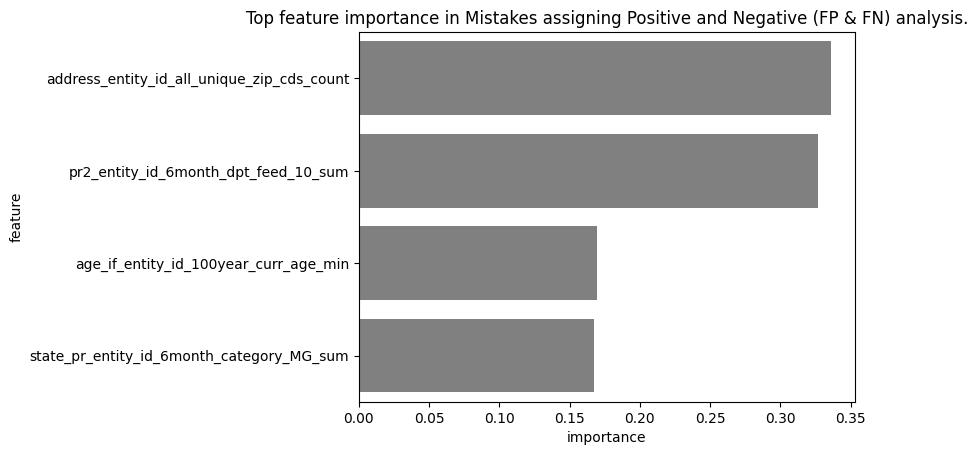


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


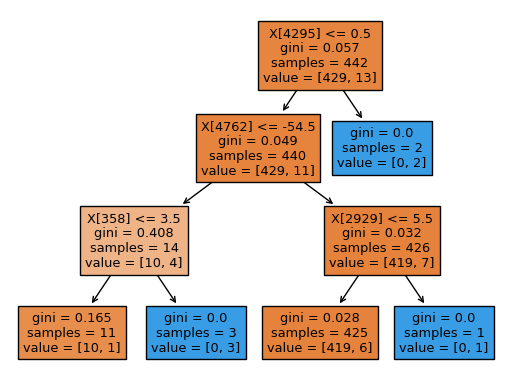

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 100
    Decision Tree with max_depth of, 5

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


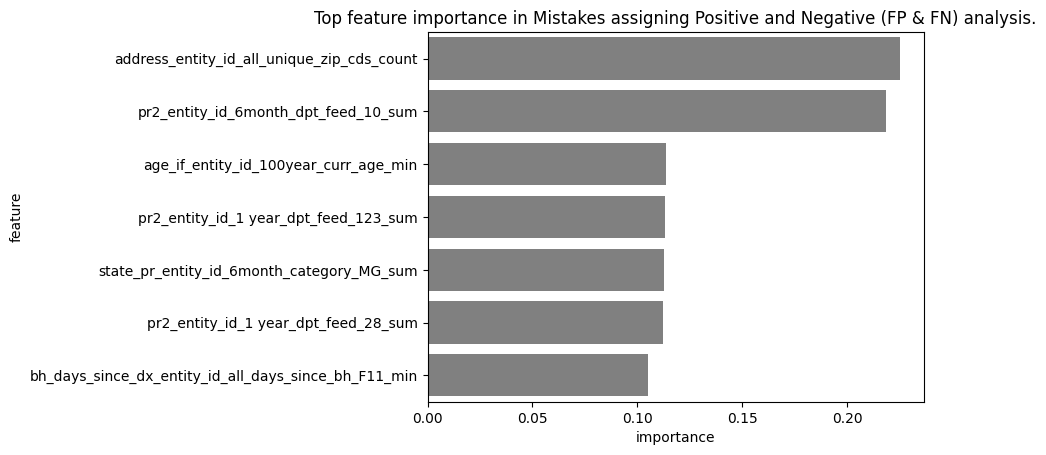


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


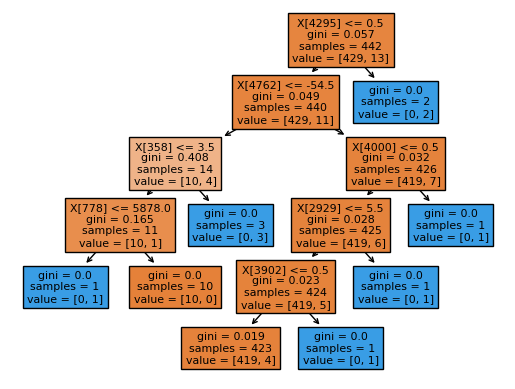

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 100
    Decision Tree with max_depth of, 10

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


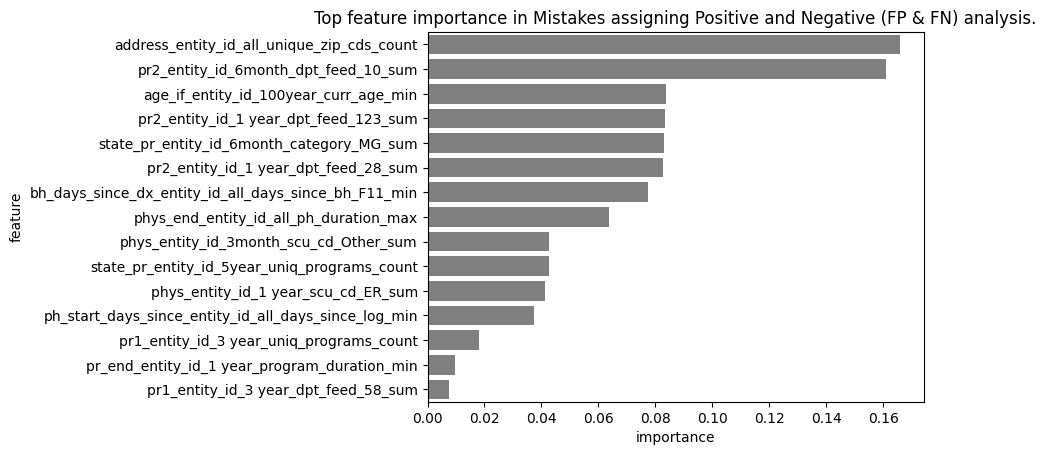


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


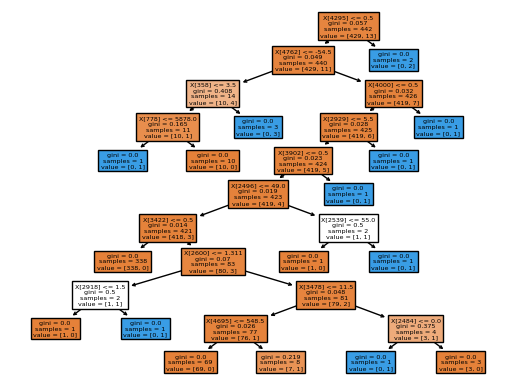

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 100
    Decision Tree with max_depth of, None

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


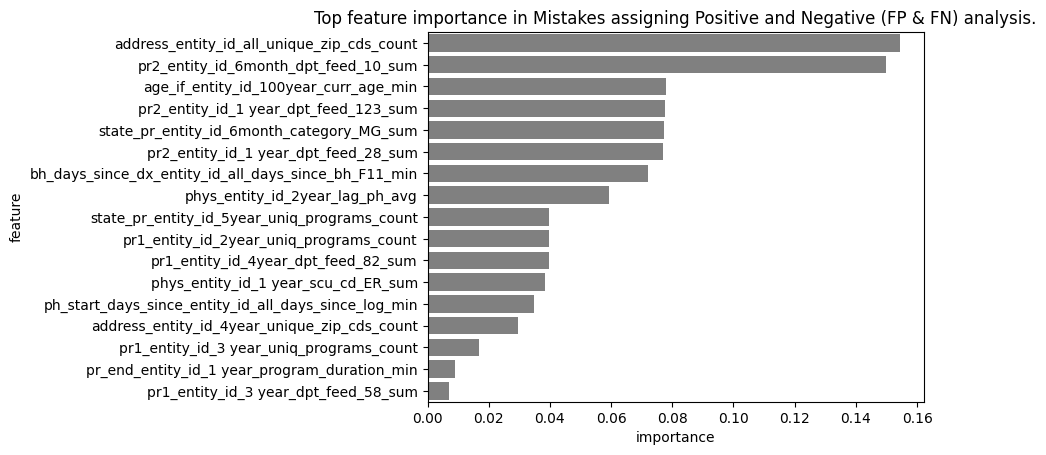


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


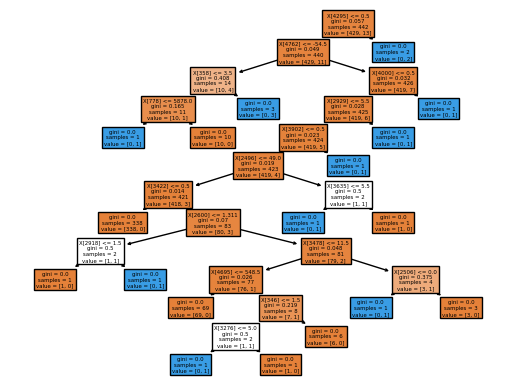

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 100
    Decision Tree with max_depth of, 1

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


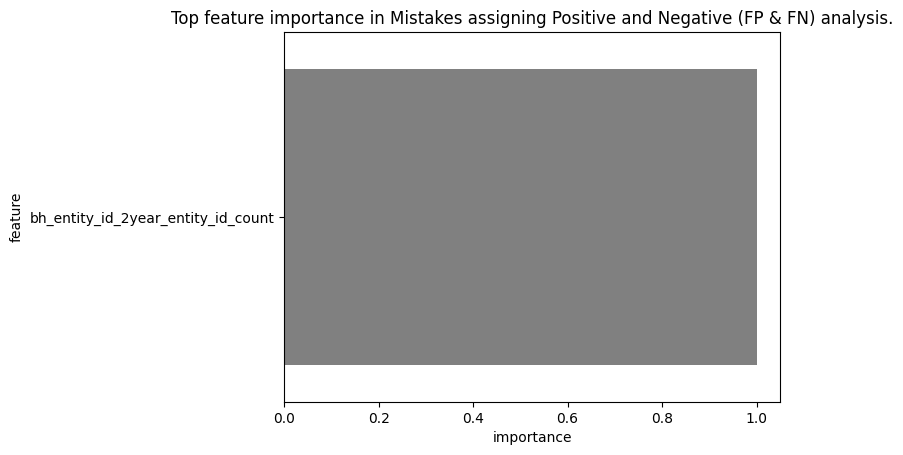


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


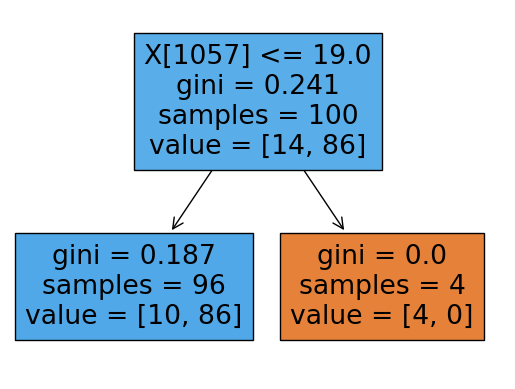

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 100
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


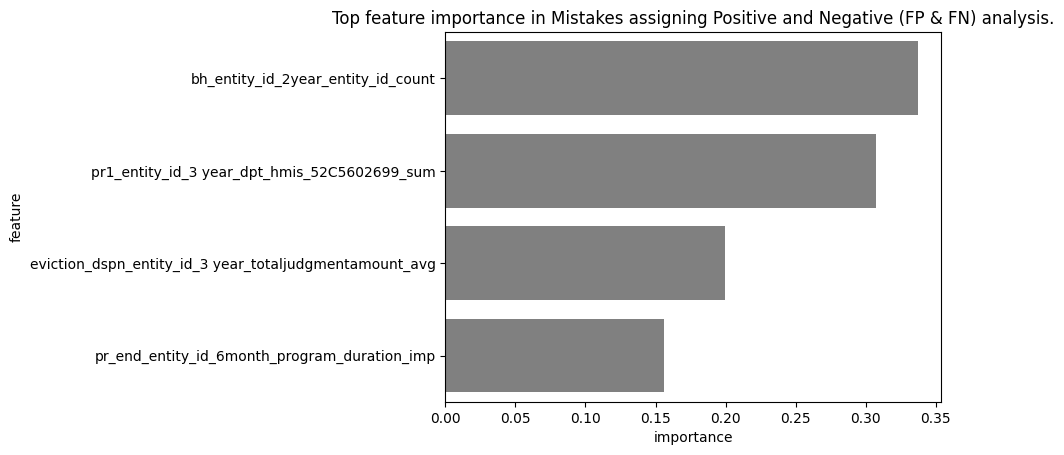


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


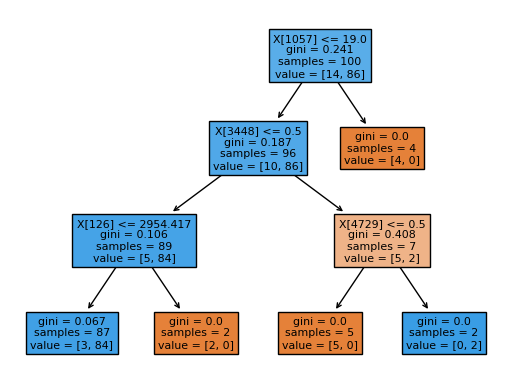

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 100
    Decision Tree with max_depth of, 5

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


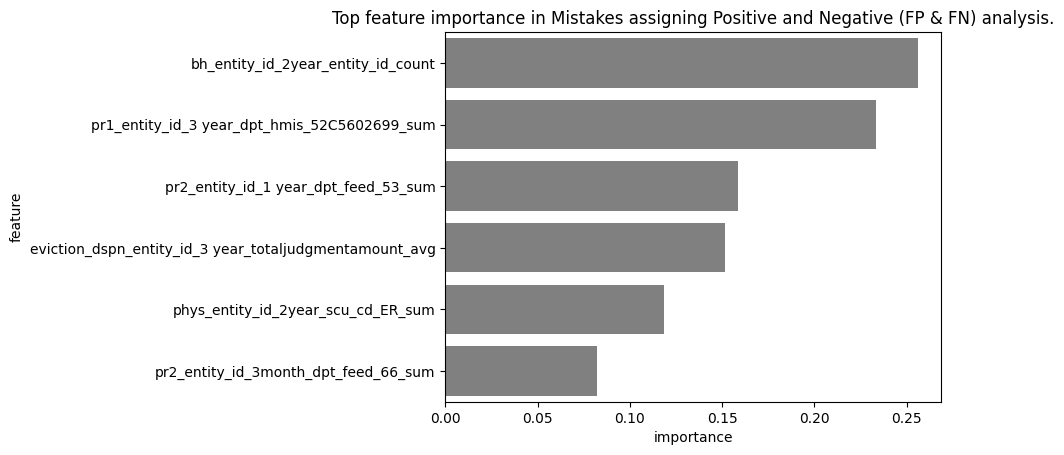


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


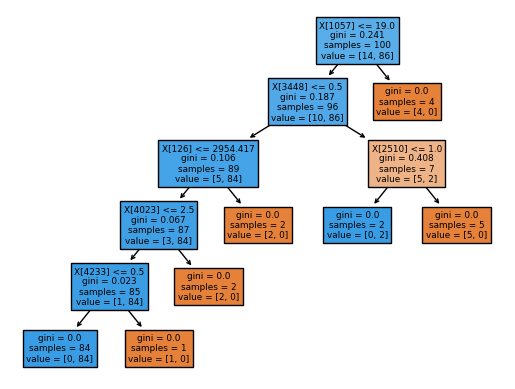

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 100
    Decision Tree with max_depth of, 10

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


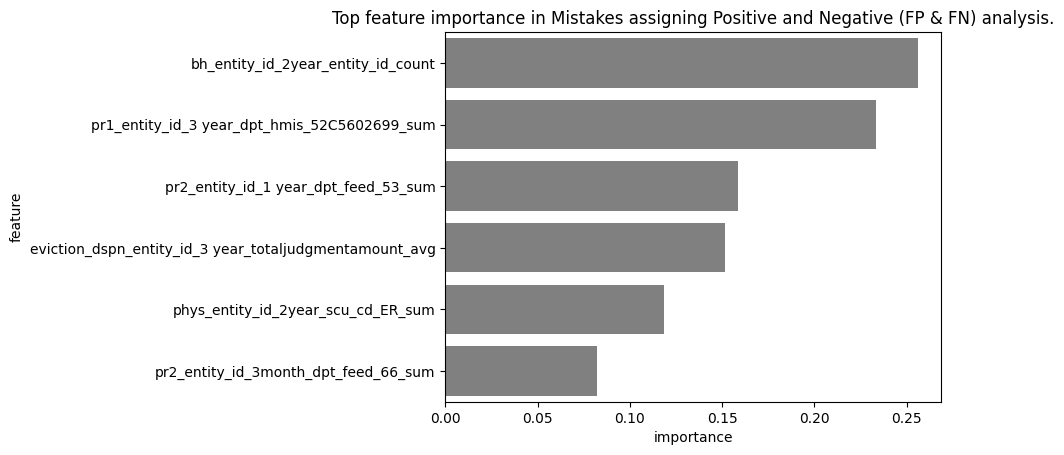


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


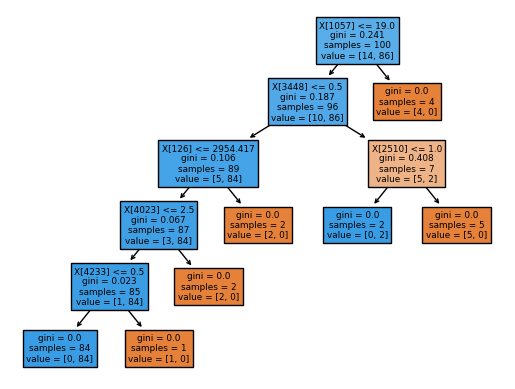

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 100
    Decision Tree with max_depth of, None

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


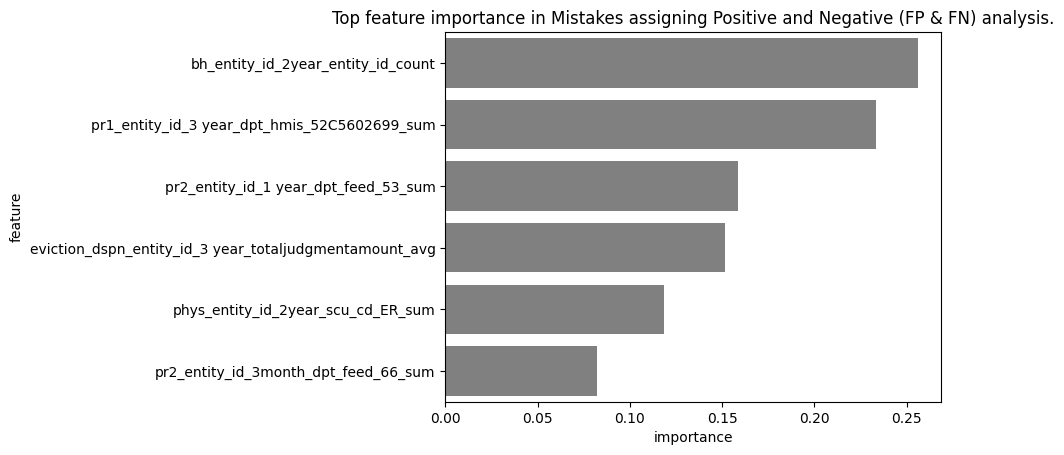


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


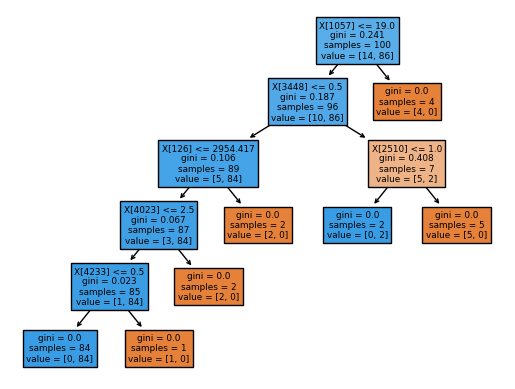

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 100
    Decision Tree with max_depth of, 1

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


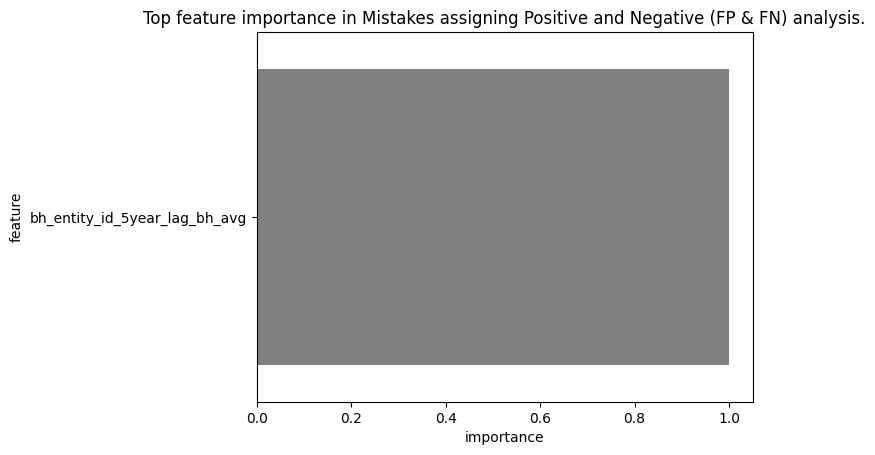


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


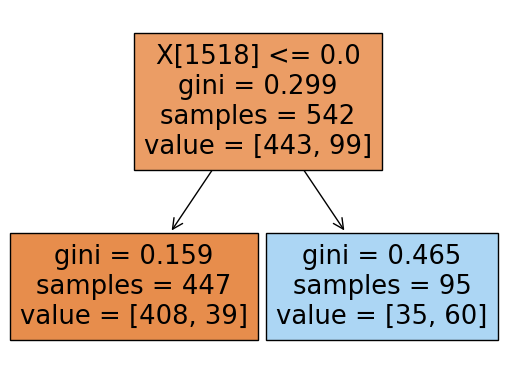

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 100
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


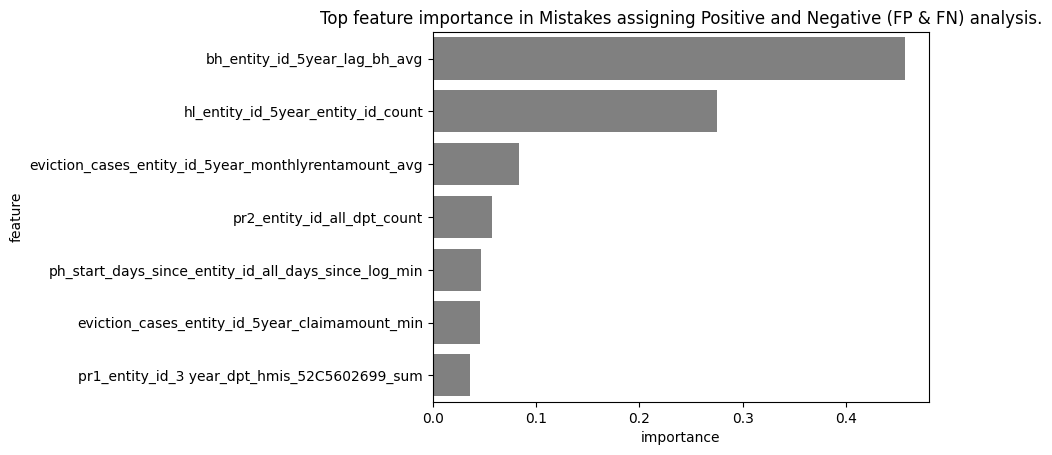


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


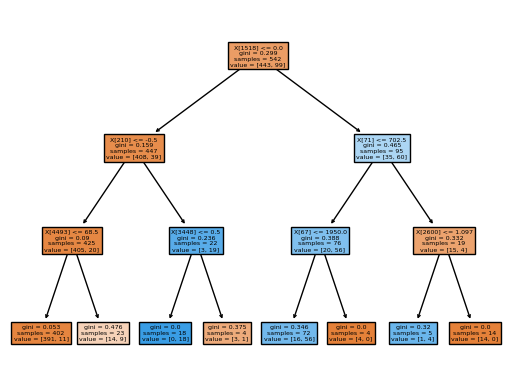

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 100
    Decision Tree with max_depth of, 5

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


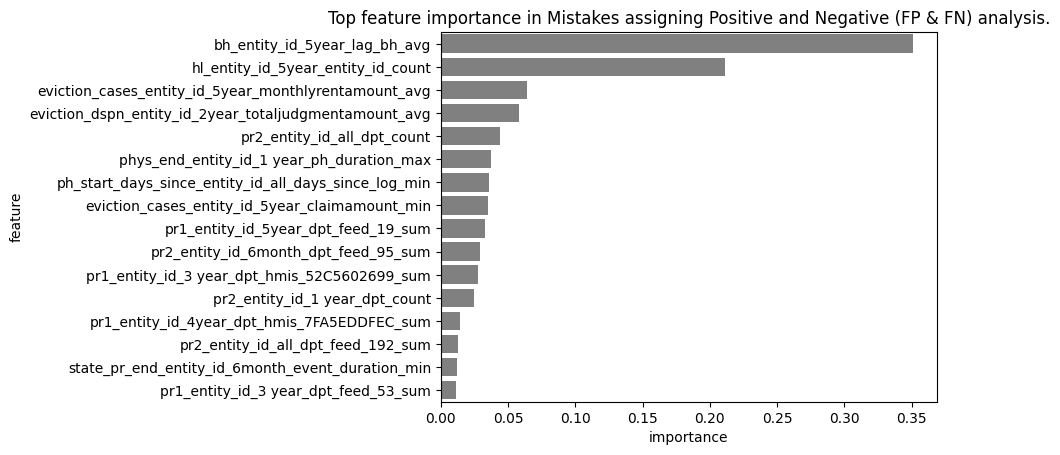


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


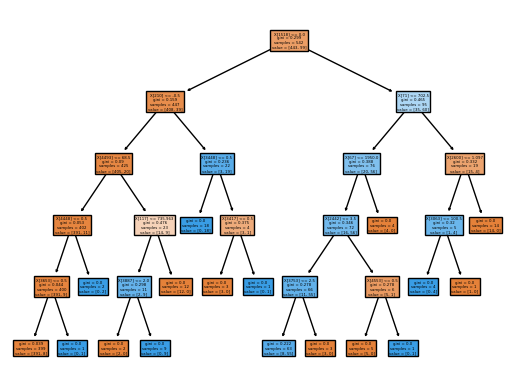

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 100
    Decision Tree with max_depth of, 10

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


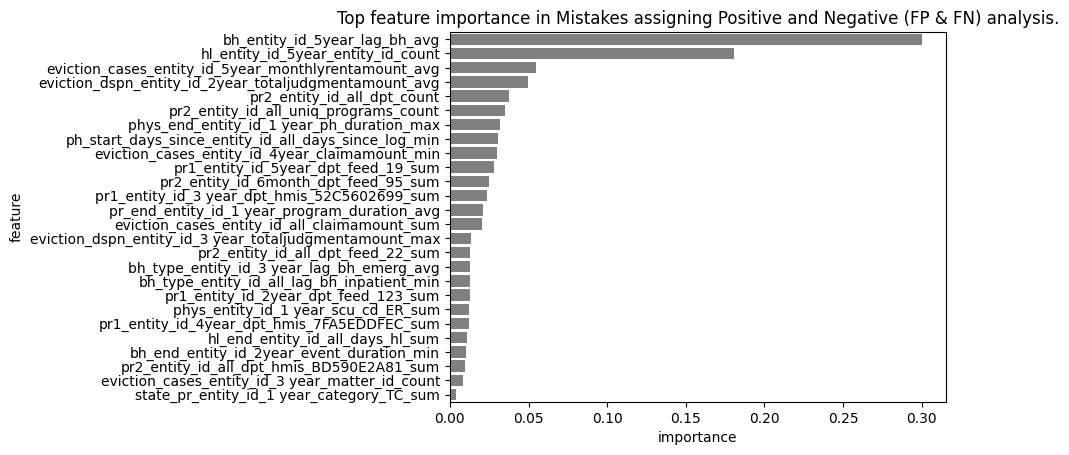


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


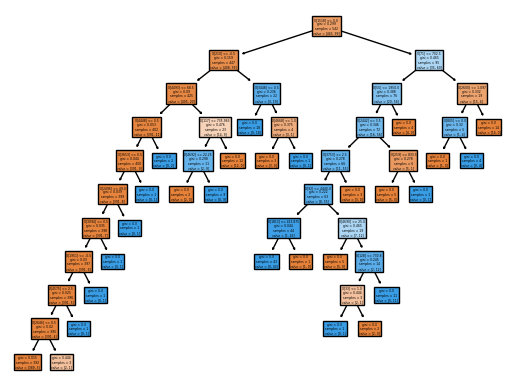

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 100
    Decision Tree with max_depth of, None

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


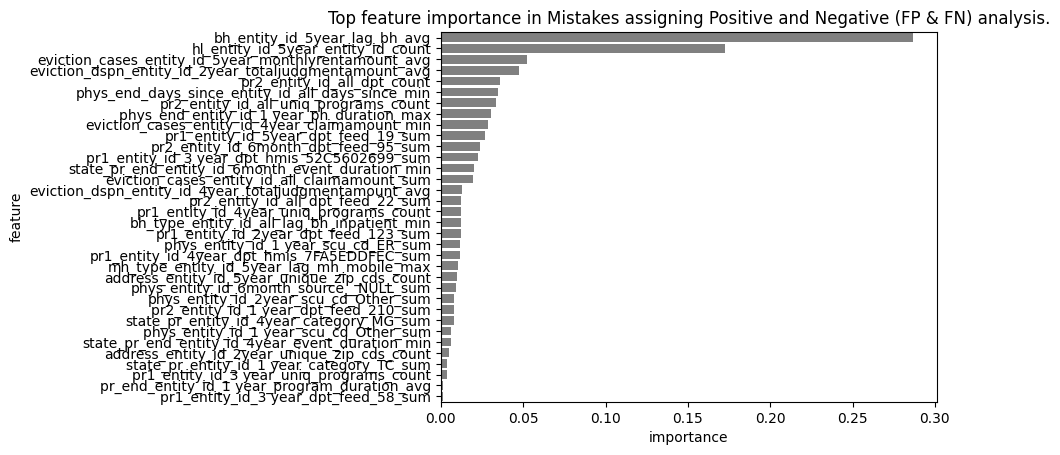


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


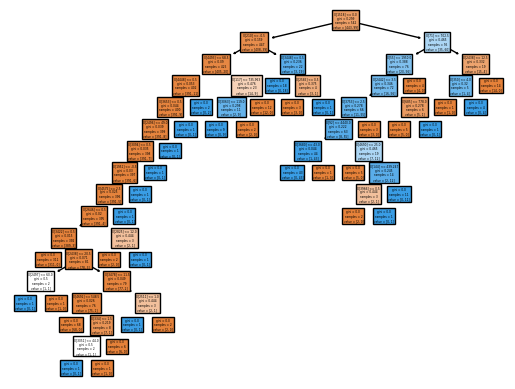

             ######            
*******************************************


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 200
    Decision Tree with max_depth of, 1

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


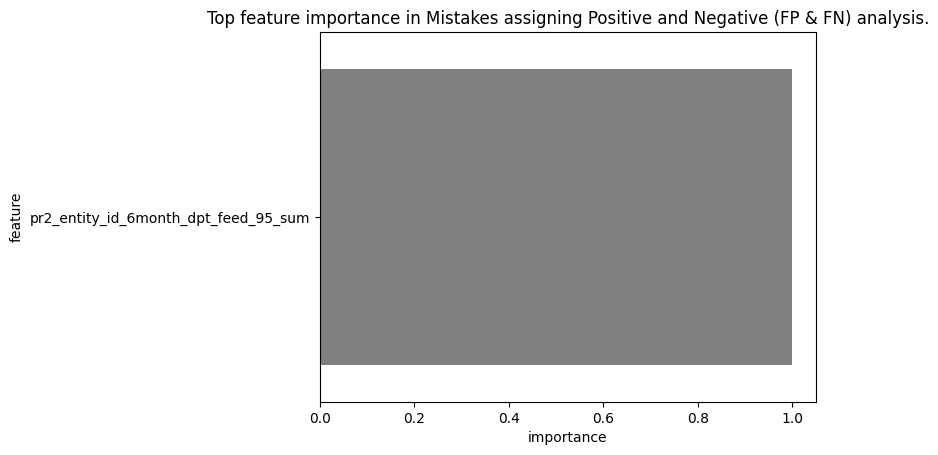


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


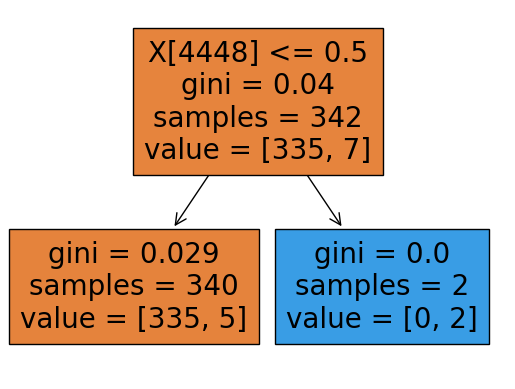

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 200
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


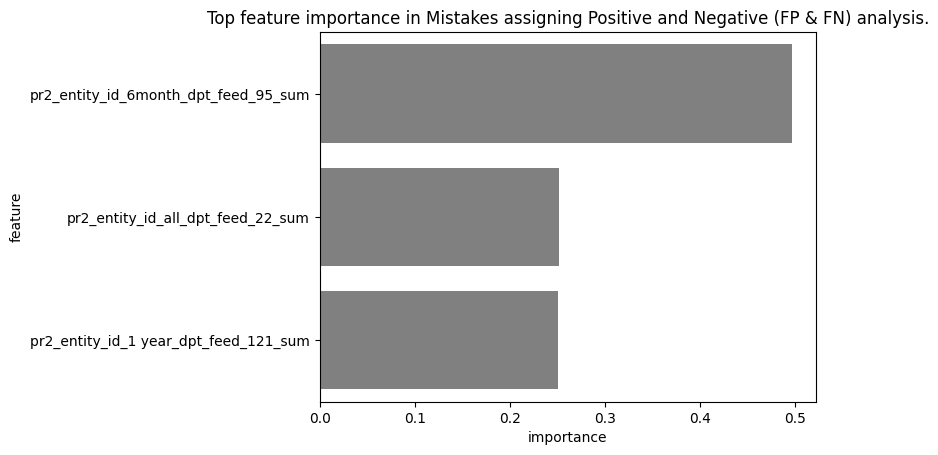


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


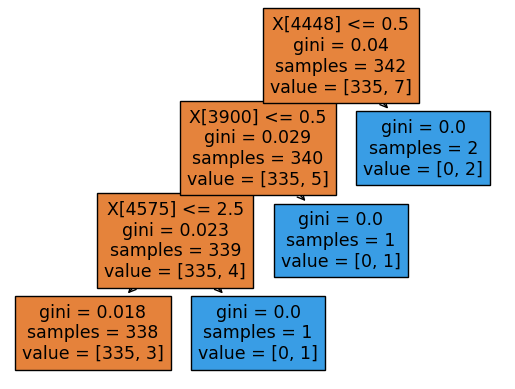

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 200
    Decision Tree with max_depth of, 5

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


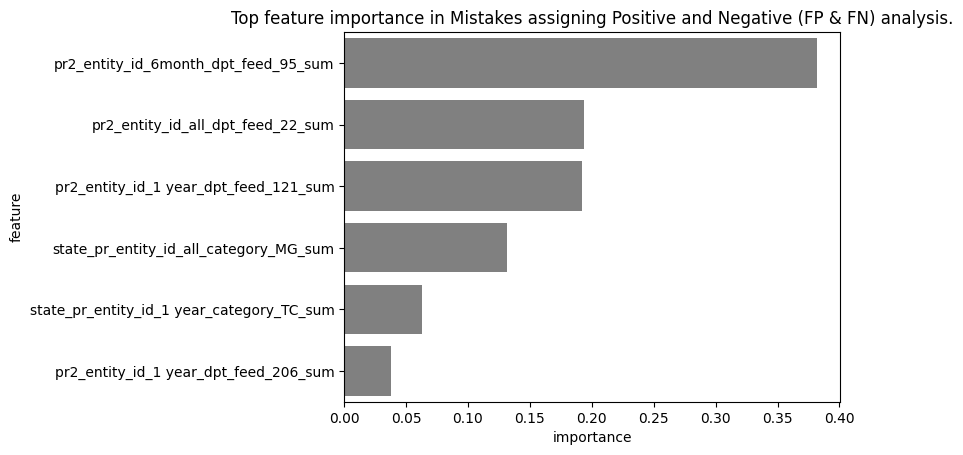


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


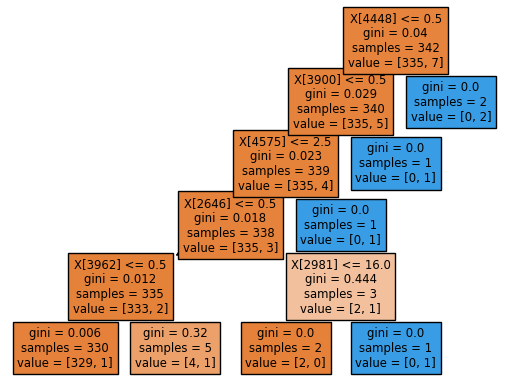

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 200
    Decision Tree with max_depth of, 10

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


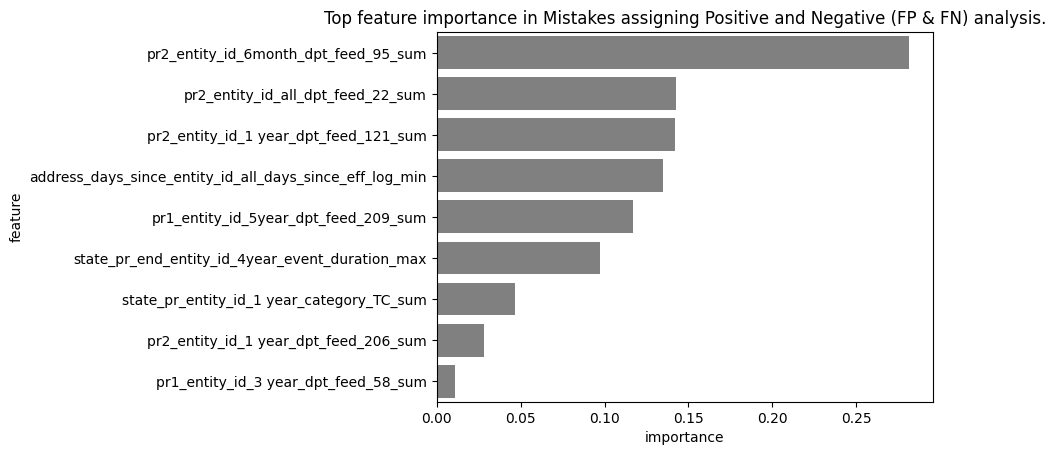


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


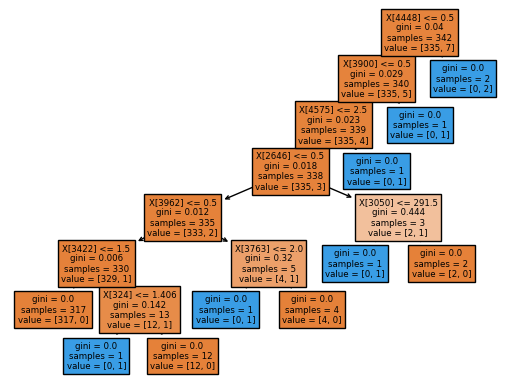

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 200
    Decision Tree with max_depth of, None

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


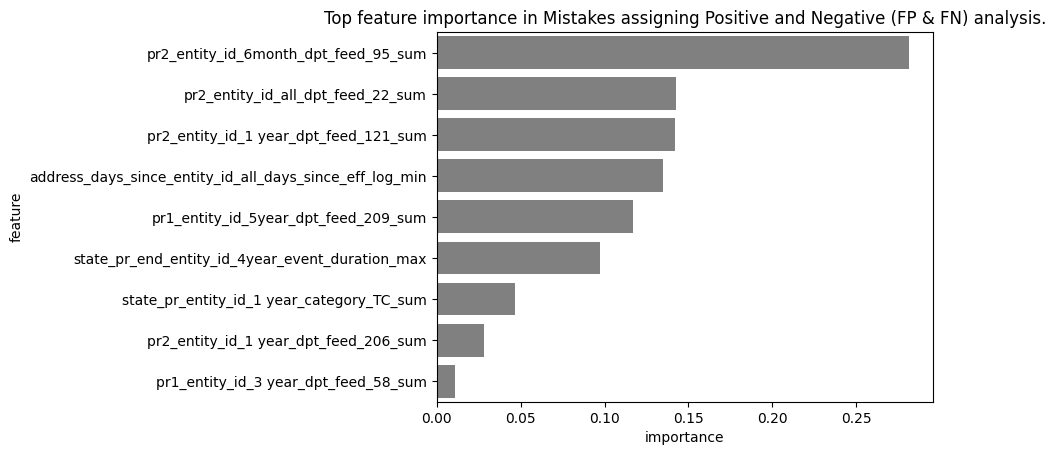


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


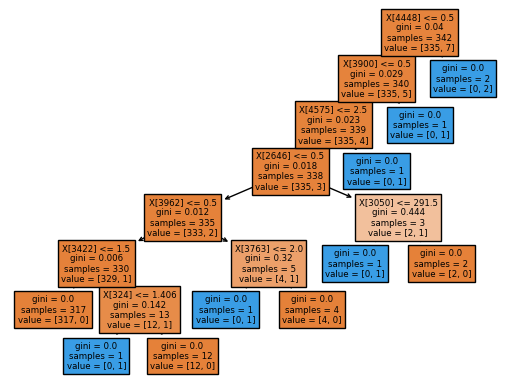

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 200
    Decision Tree with max_depth of, 1

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


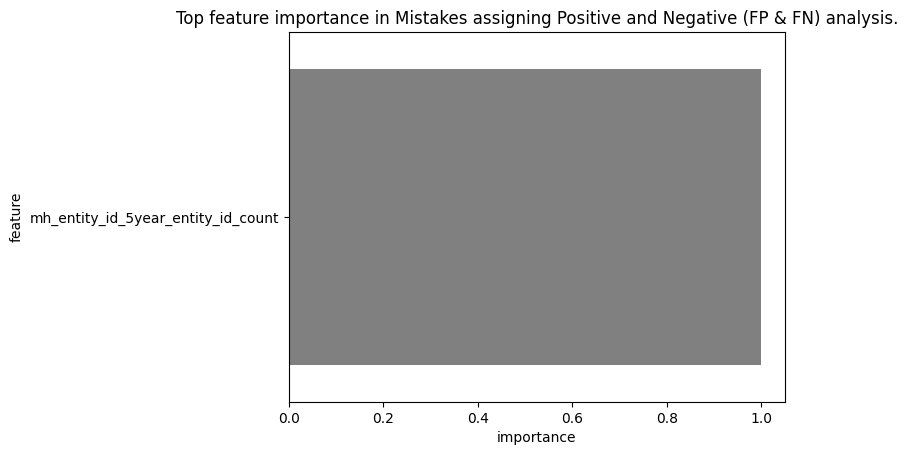


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


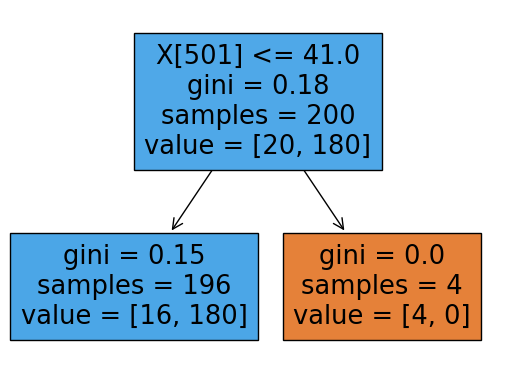

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 200
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


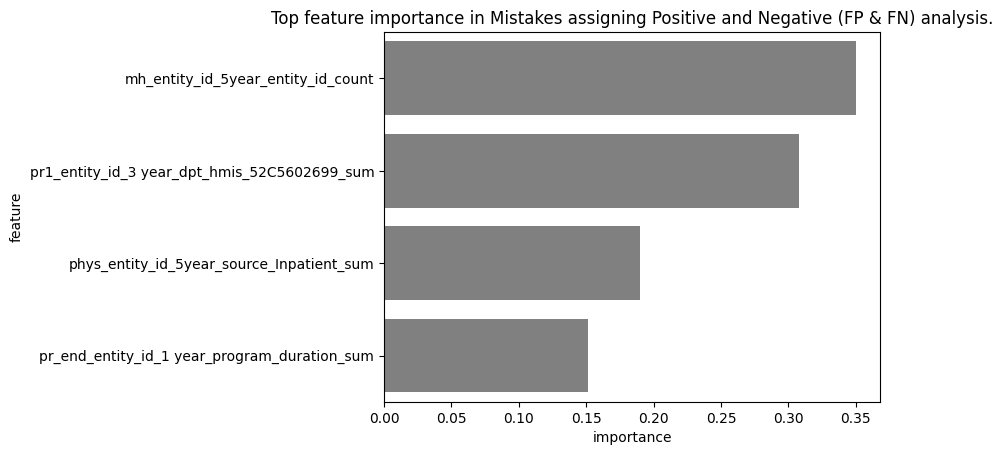


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


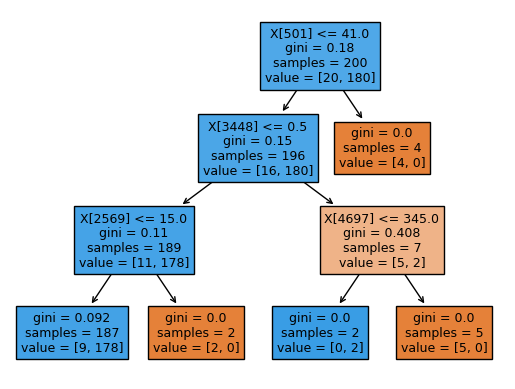

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 200
    Decision Tree with max_depth of, 5

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


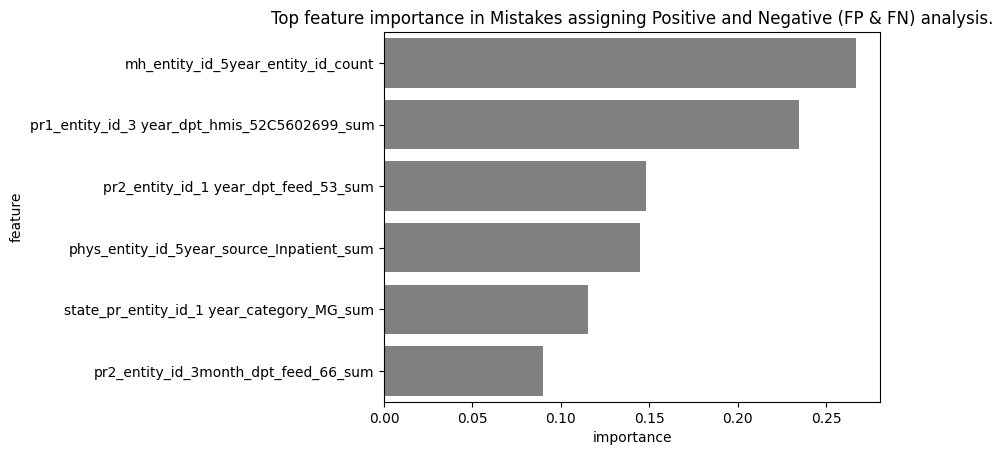


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


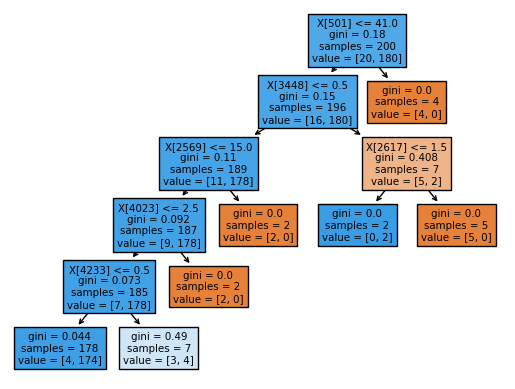

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 200
    Decision Tree with max_depth of, 10

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


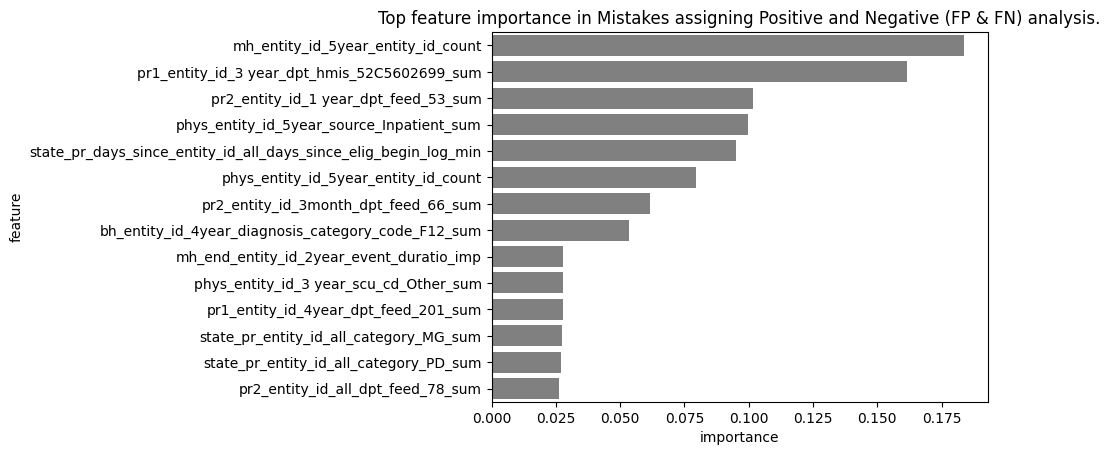


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


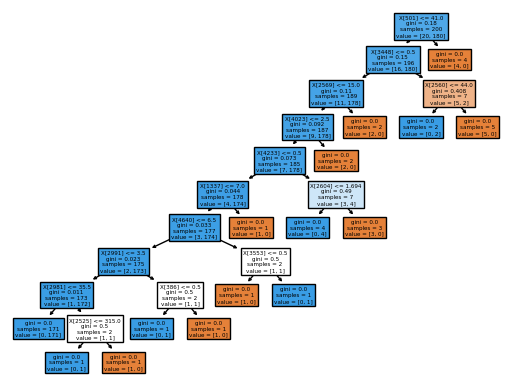

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 200
    Decision Tree with max_depth of, None

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


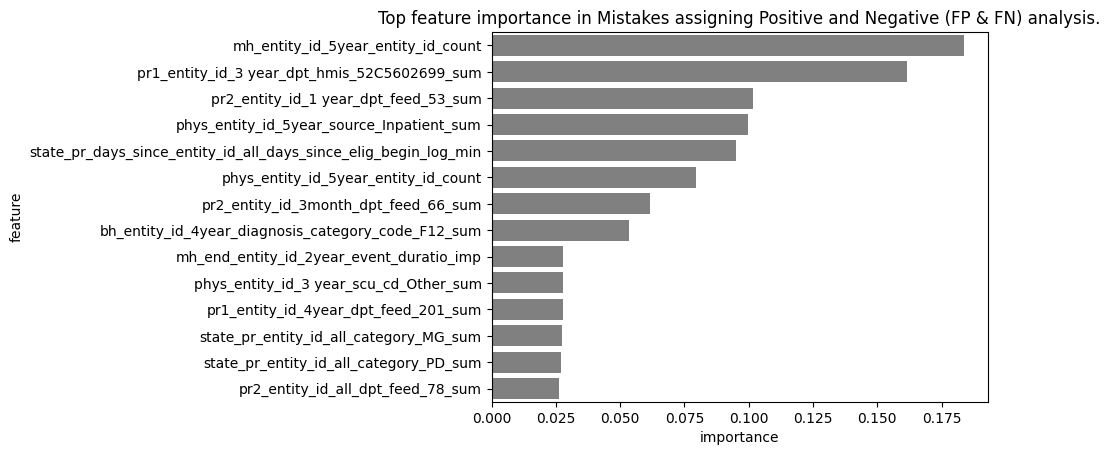


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


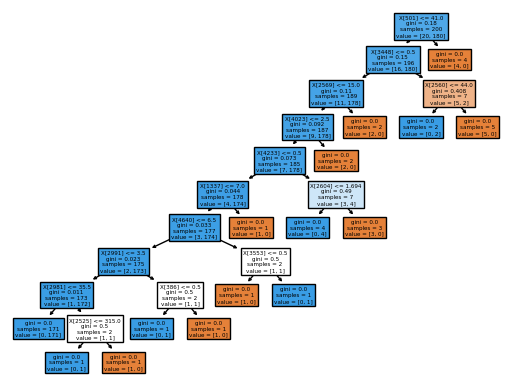

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 200
    Decision Tree with max_depth of, 1

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


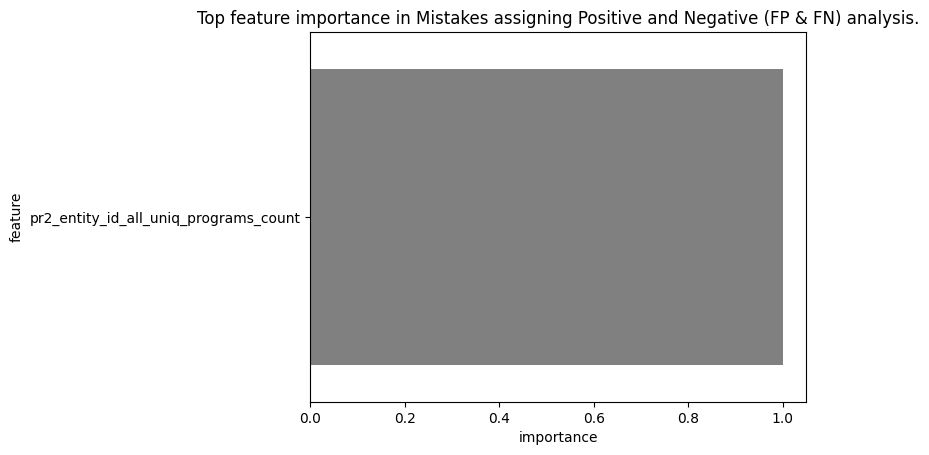


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


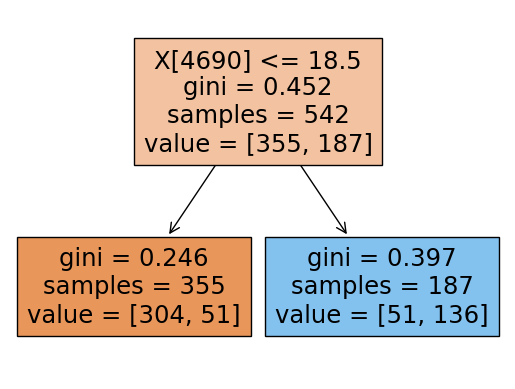

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 200
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


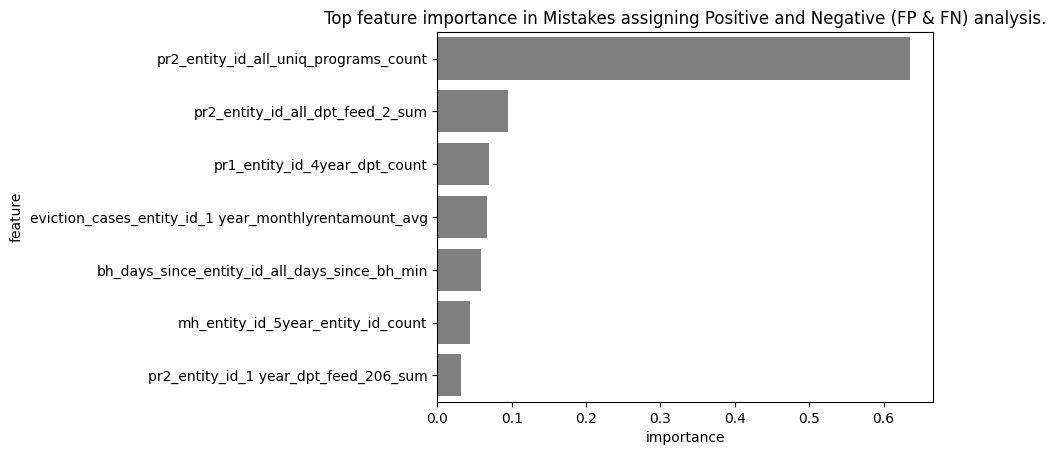


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


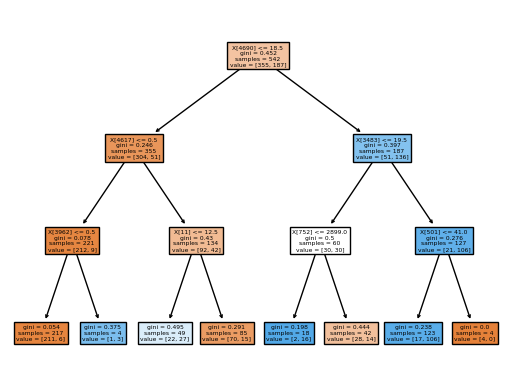

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 200
    Decision Tree with max_depth of, 5

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


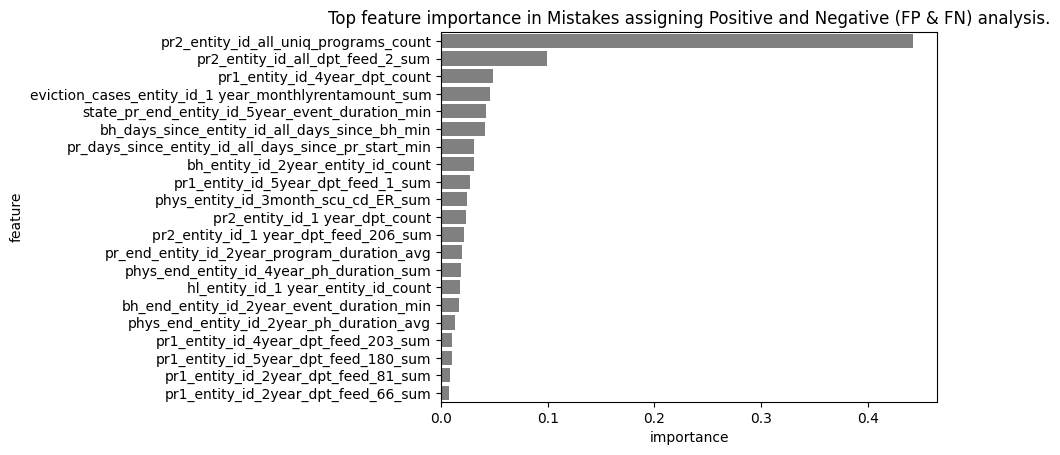


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


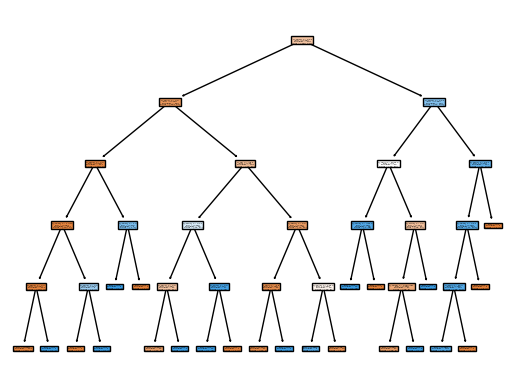

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 200
    Decision Tree with max_depth of, 10

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


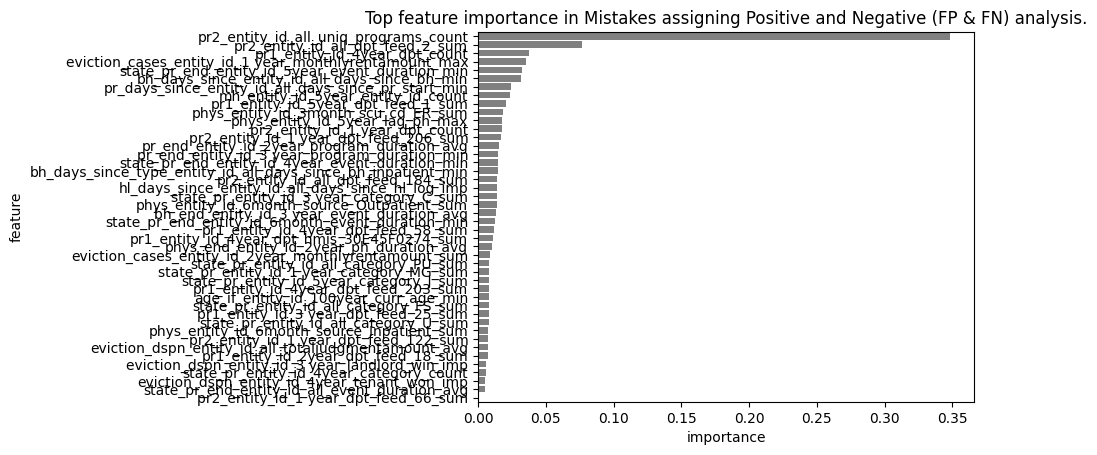


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


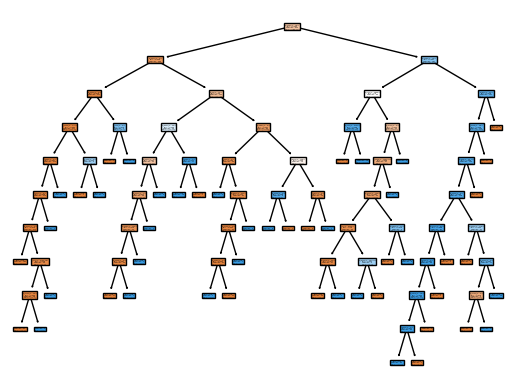

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 200
    Decision Tree with max_depth of, None

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


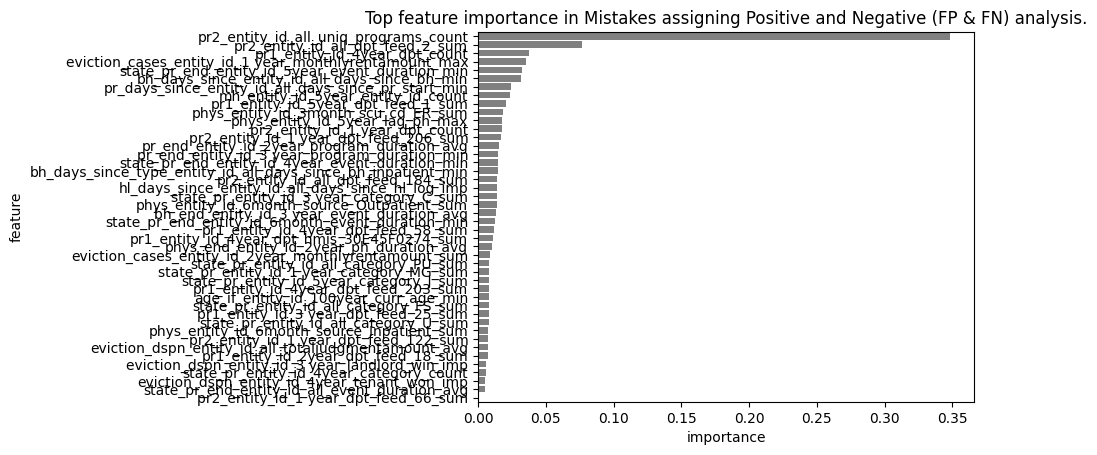


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


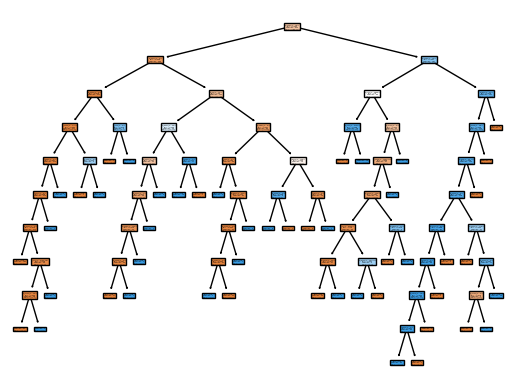

             ######            
*******************************************


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 300
    Decision Tree with max_depth of, 1

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


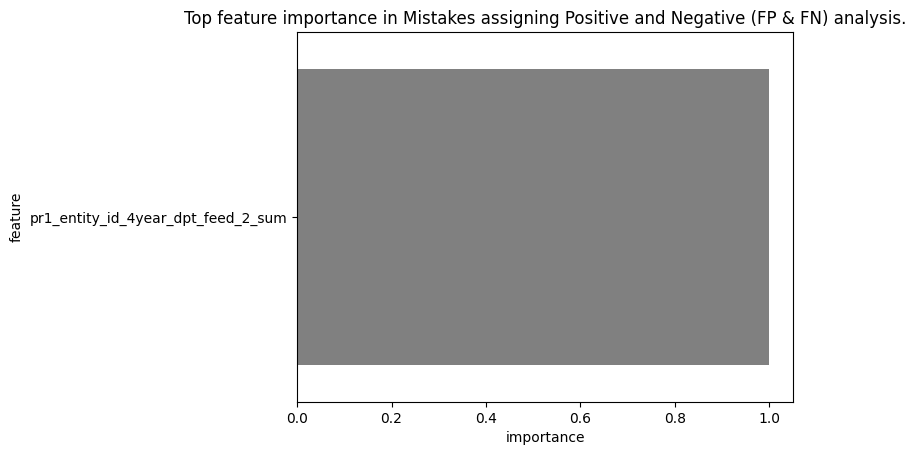


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


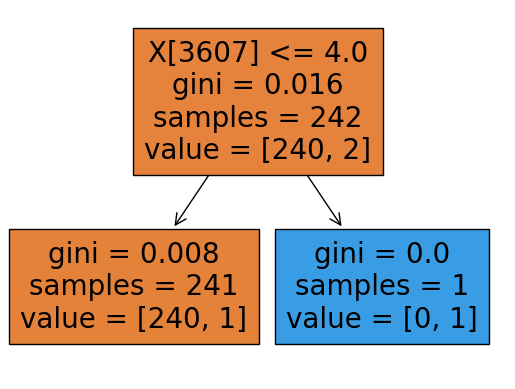

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 300
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


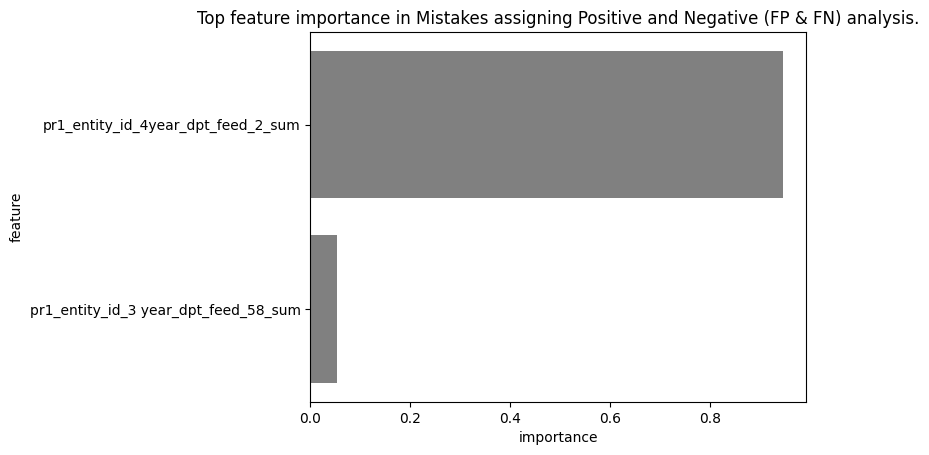


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


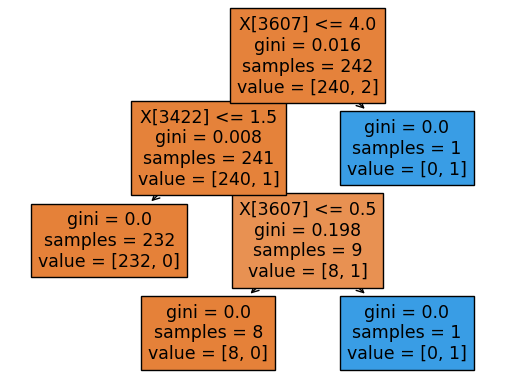

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 300
    Decision Tree with max_depth of, 5

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


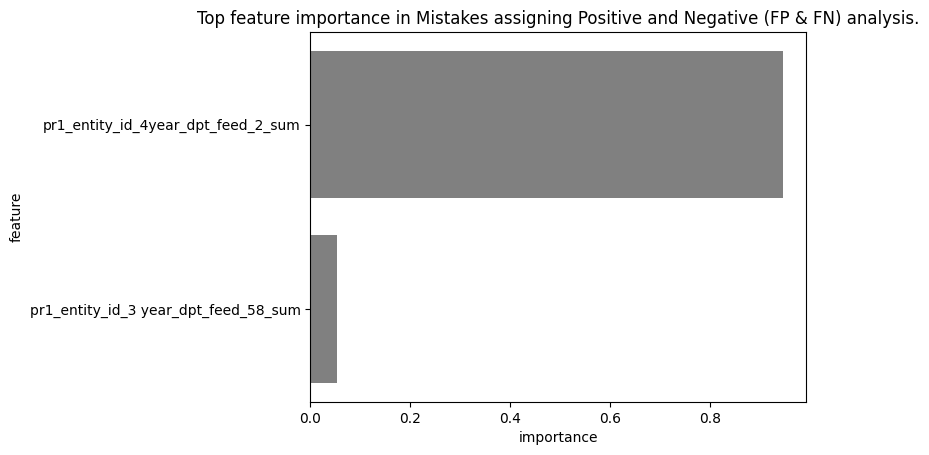


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


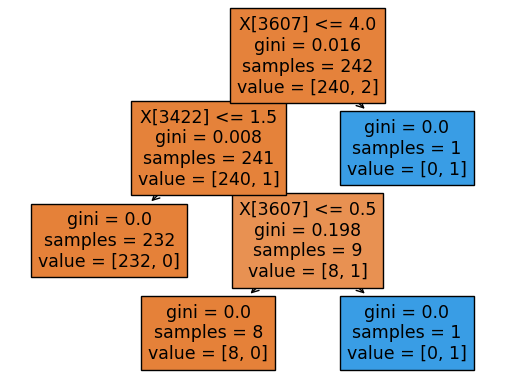

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 300
    Decision Tree with max_depth of, 10

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


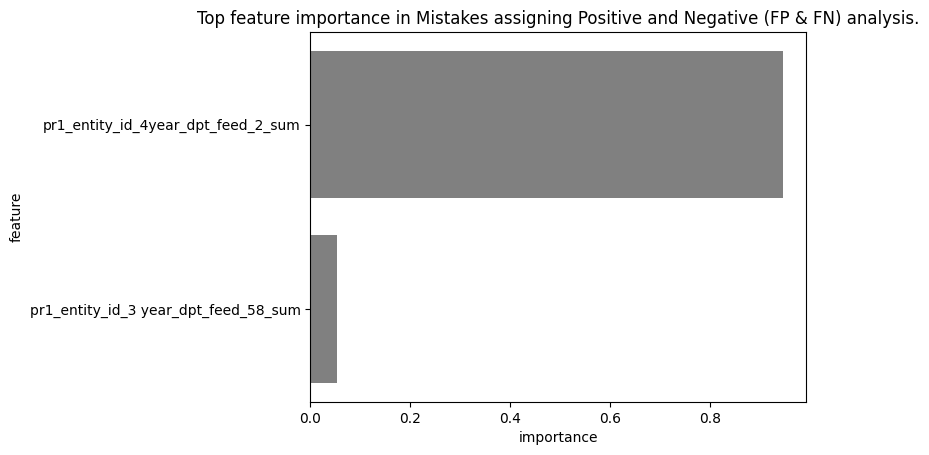


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


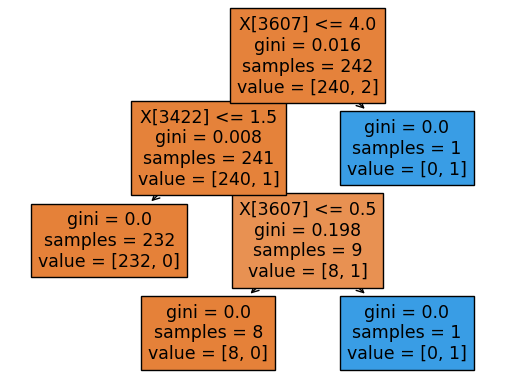

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 300
    Decision Tree with max_depth of, None

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


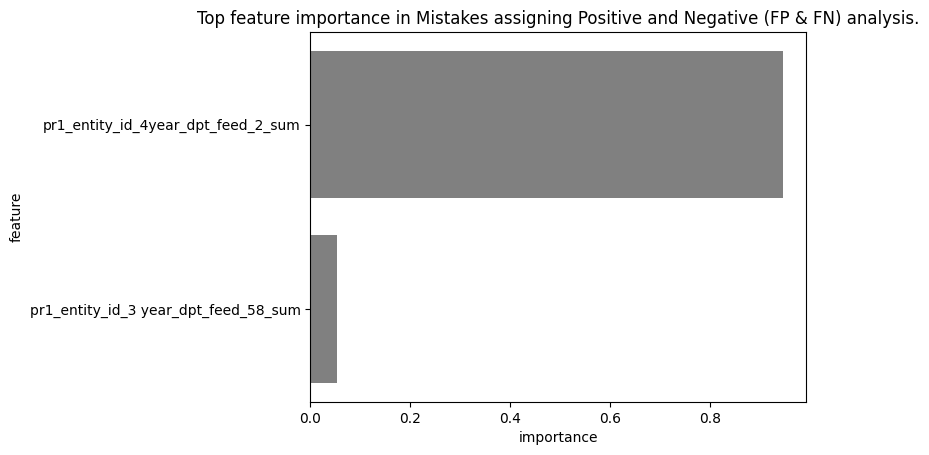


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


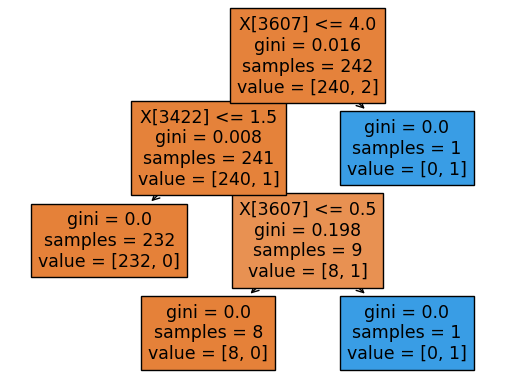

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 300
    Decision Tree with max_depth of, 1

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


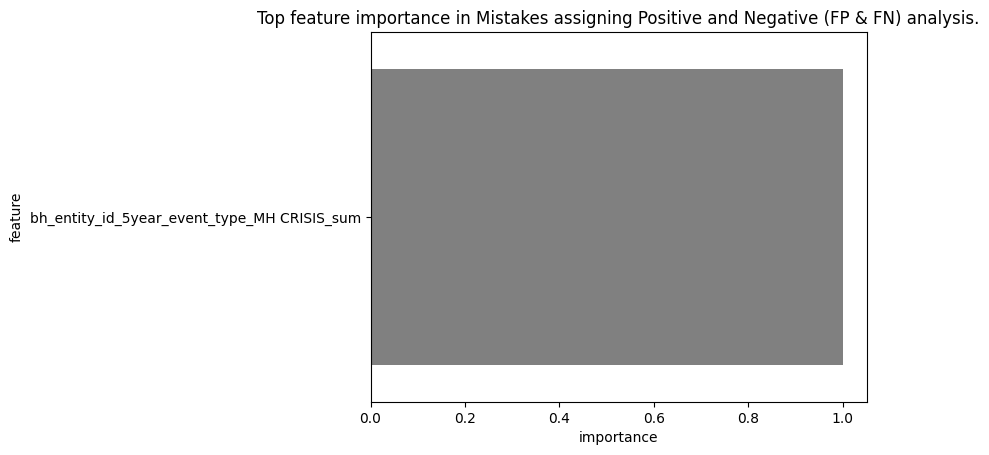


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


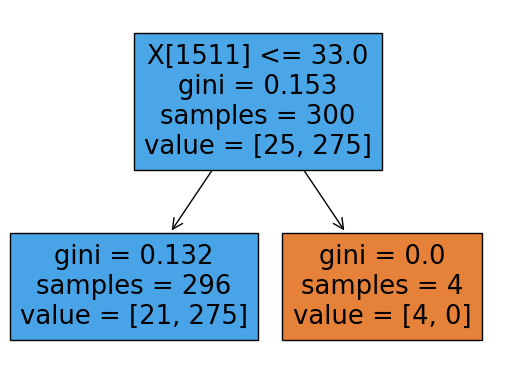

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 300
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


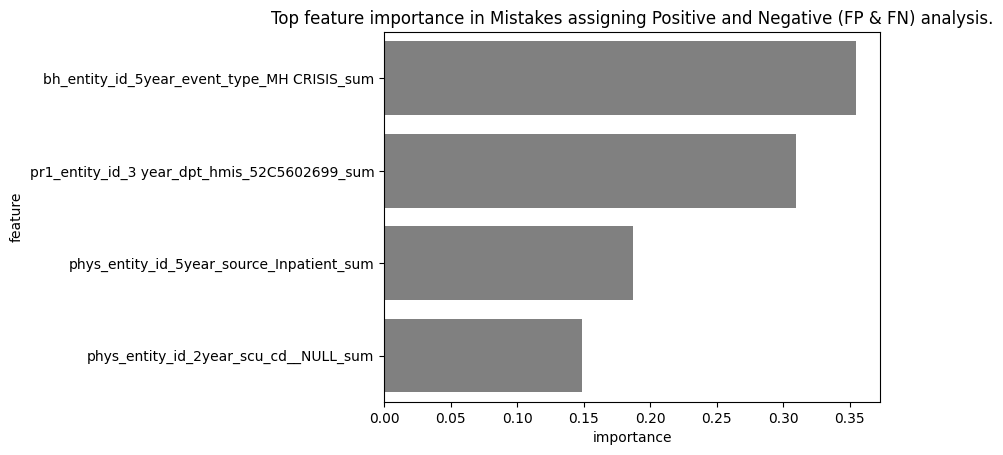


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


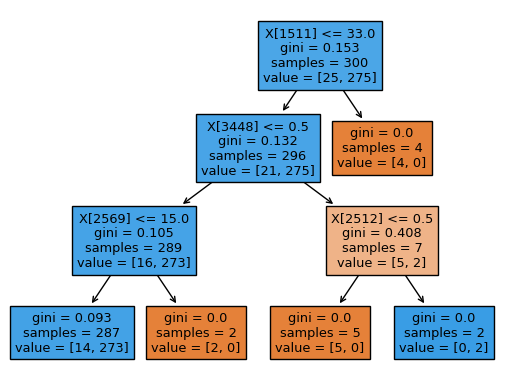

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 300
    Decision Tree with max_depth of, 5

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


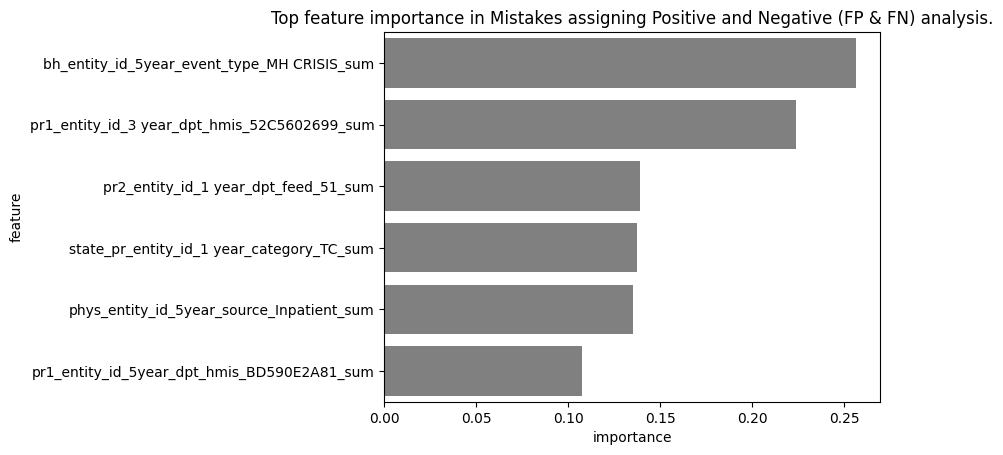


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


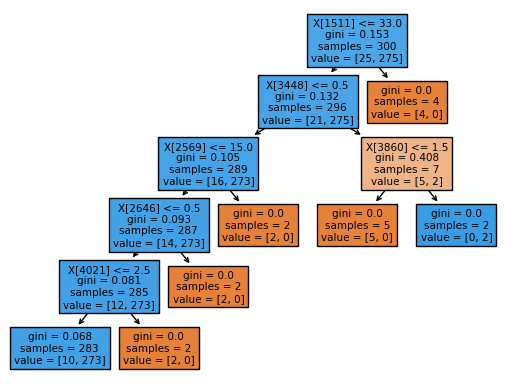

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 300
    Decision Tree with max_depth of, 10

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


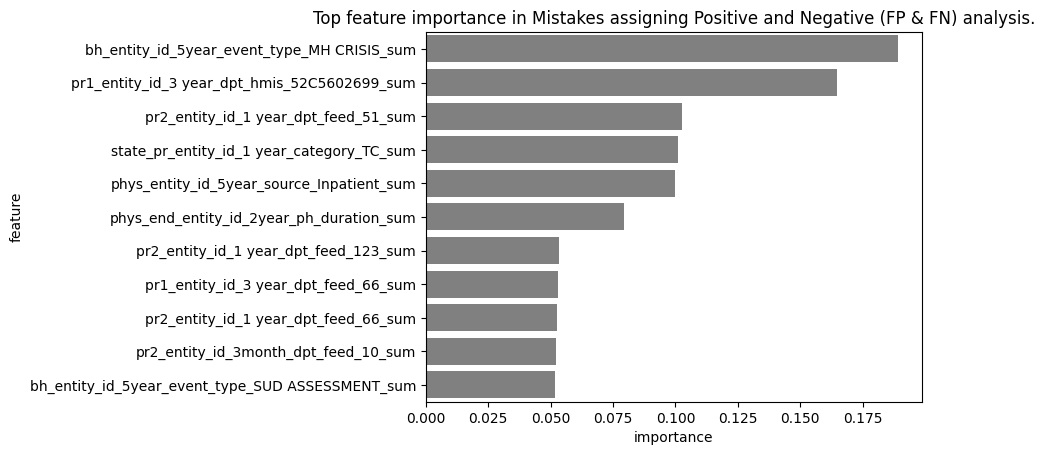


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


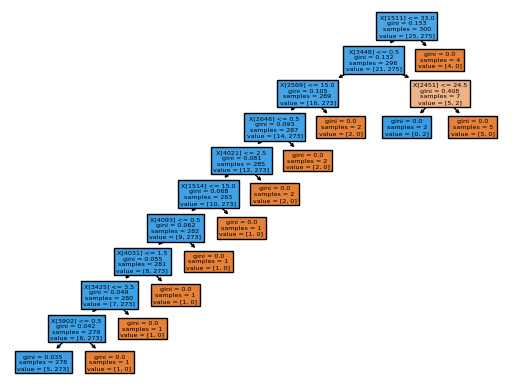

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 300
    Decision Tree with max_depth of, None

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


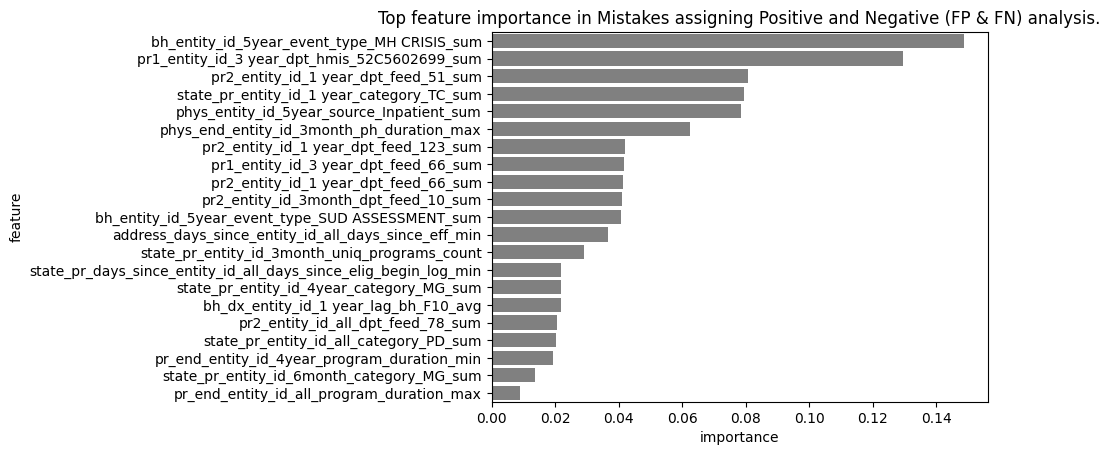


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


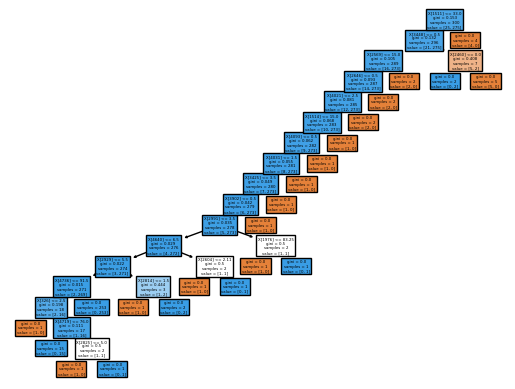

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 300
    Decision Tree with max_depth of, 1

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


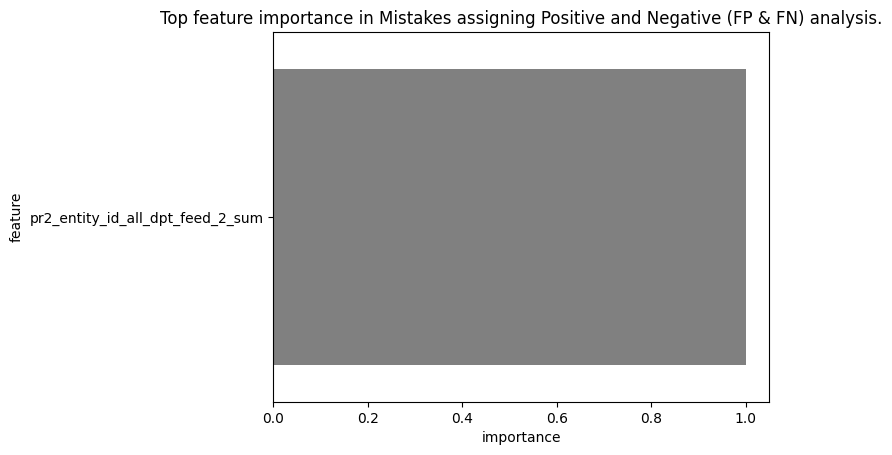


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


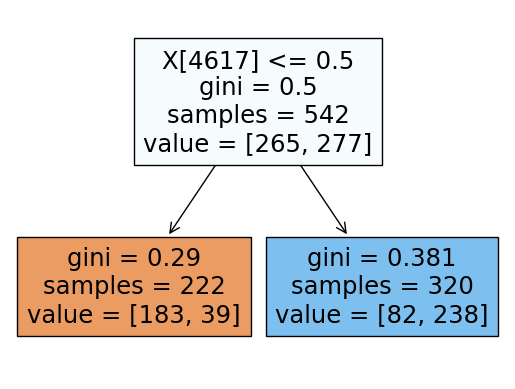

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 300
    Decision Tree with max_depth of, 3

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


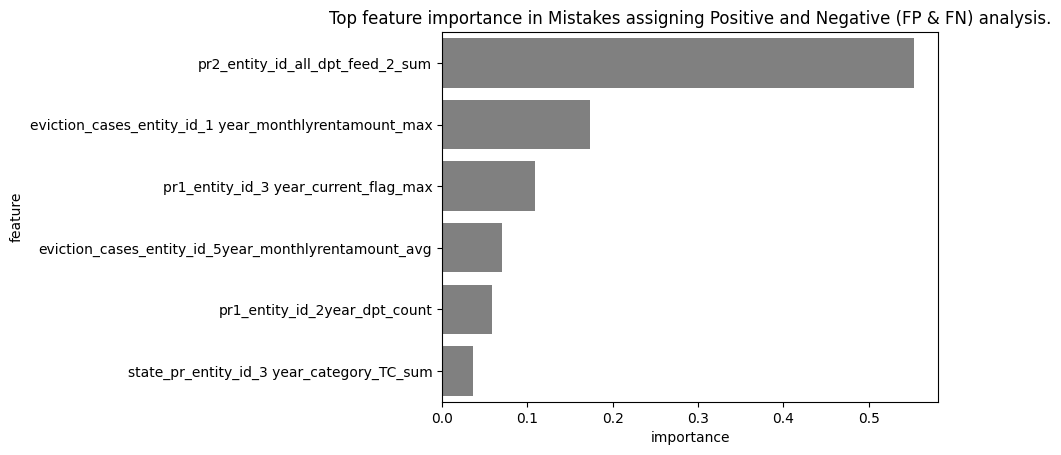


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


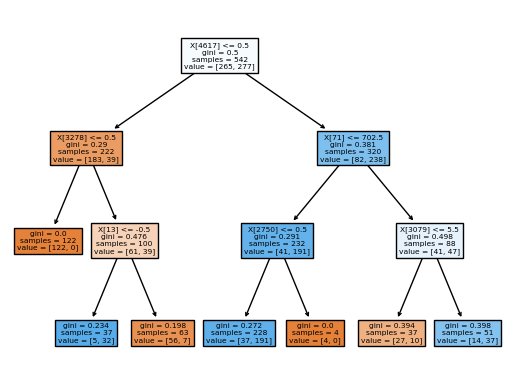

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 300
    Decision Tree with max_depth of, 5

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


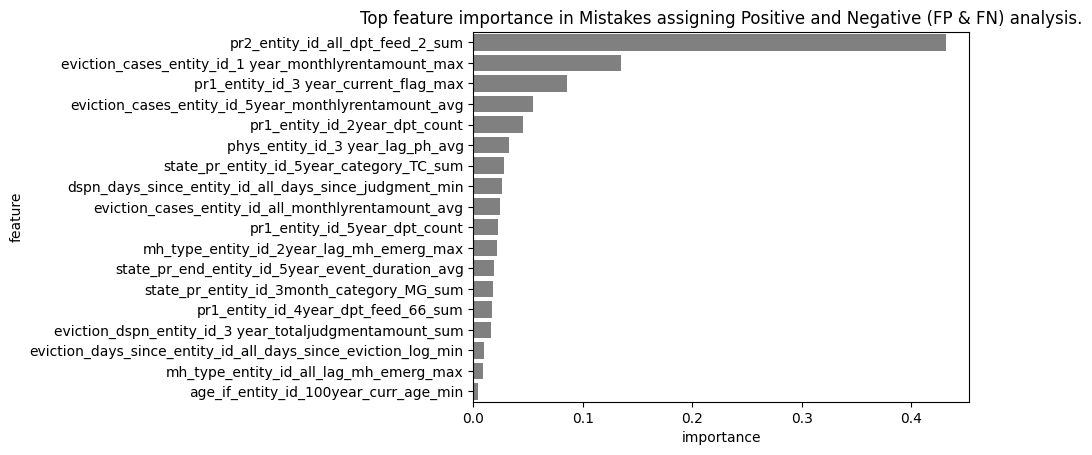


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


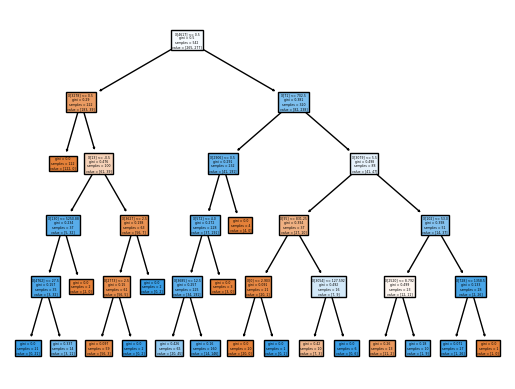

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 300
    Decision Tree with max_depth of, 10

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


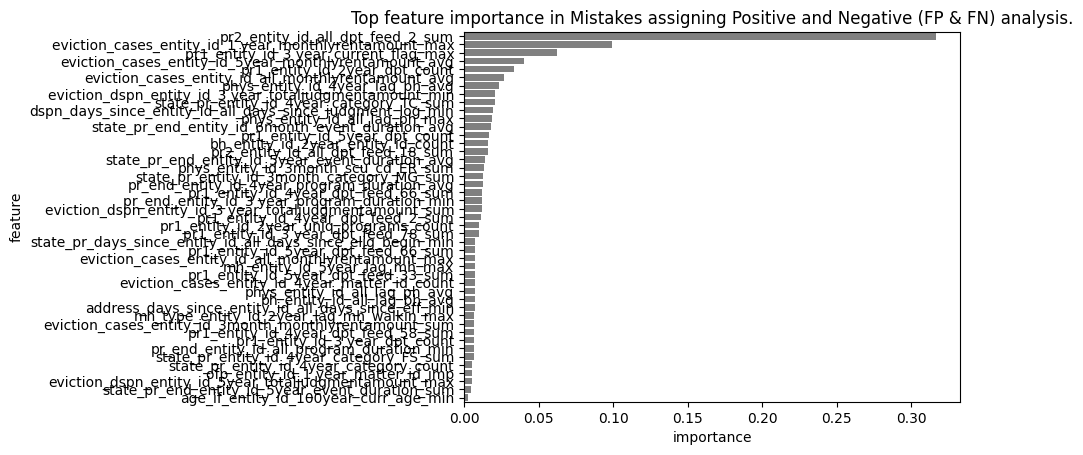


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


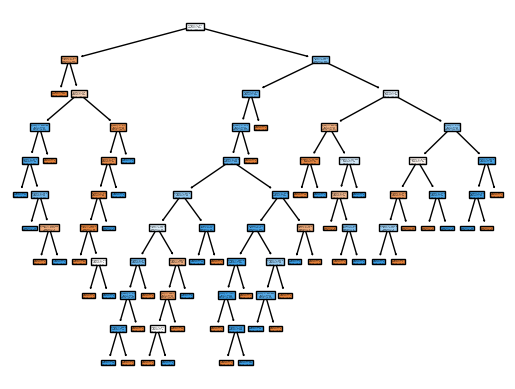

             ######            


    Error analysis type: Mistakes assigning Positive and Negative (FP & FN)
    Size of the list: 300
    Decision Tree with max_depth of, None

    Top feature importance associated with error in label type Mistakes assigning Positive and Negative (FP & FN)
    


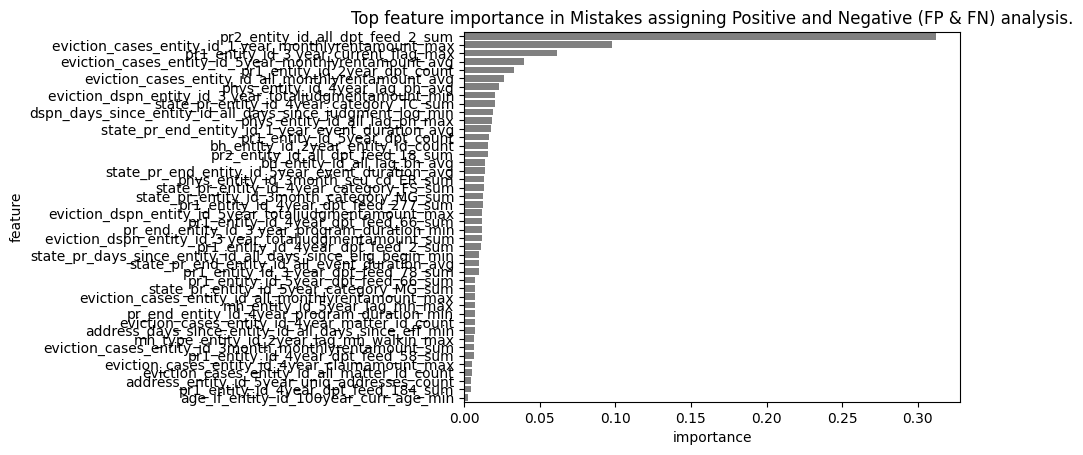


    Rules made with the top features associated with Mistakes assigning Positive and Negative (FP & FN)
    


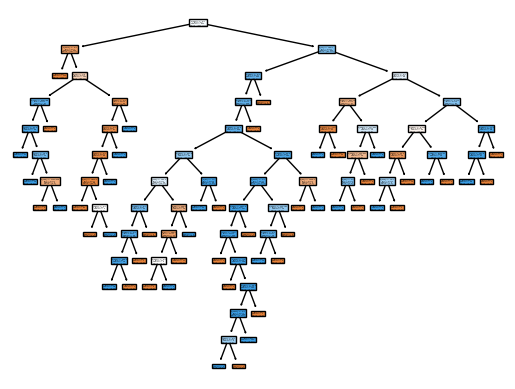

             ######            
*******************************************


In [13]:
output_all_analysis(error_analysis_results)